#### Data Loading

#### Description:
##### how it woks
1.Calculate the correlation
2.Normalize the correlation inside two group of features, Adult and Fetal into Rang1
3.Clustering 
Result Not good

In [2]:
# CutTree1.Loading_data.R
#### 1.Load dataset
###### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset_merge.syn2623706.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno.merge.syn2623706
#head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
#head(COAD_tpm_symbol)
## Read log10(x+1) transformed scReference 

#### Load scReference V5 
scReference.log10.CV <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2020_1_29_scReferenceV5.Subset.Features.log10.CV.rds")
scReference.list.log10.CV8000 <- scReference.log10.CV$scReference.list.log10.CV8000
scReference.list.log10.CV4500 <- scReference.log10.CV$scReference.list.log10.CV4500
scReference.list.log10.CV4000 <- scReference.log10.CV$scReference.list.log10.CV4000
scReference.list.log10.CV3500 <- scReference.log10.CV$scReference.list.log10.CV3500
scReference.list.log10.CV3000 <- scReference.log10.CV$scReference.list.log10.CV3000
scReference.list.log10.CV2500 <- scReference.log10.CV$scReference.list.log10.CV2500
scReference.list.log10.CV2000 <- scReference.log10.CV$scReference.list.log10.CV2000
#### 2.Distance calculation
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
#summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
# Expression data transformation Log(x+1)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, scReference.list.log10.CV8000)
Cor.Res.CV4500 <- refCorMerge(Log10.expList, scReference.list.log10.CV4500)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, scReference.list.log10.CV4000)
Cor.Res.CV3500 <- refCorMerge(Log10.expList, scReference.list.log10.CV3500)
Cor.Res.CV3000 <- refCorMerge(Log10.expList, scReference.list.log10.CV3000)
Cor.Res.CV2500 <- refCorMerge(Log10.expList, scReference.list.log10.CV2500)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, scReference.list.log10.CV2000)
### Find tumor samples
### only tumor samples
TumorID <- rownames(COAD.pheno[COAD.pheno$sampleTypes == "Tumor",])
COAD.pheno.tumor <- COAD.pheno[TumorID,c("sampleTypes","msi","cimp")]

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


In [7]:
### Only select 2500
Cor.merged.CV2500 <- Cor.Res.CV2500$Cor.merged[,TumorID]
#Remove Tcells
Cor.merged.CV2500.colon <- Cor.merged.CV2500[c(1:39),]
#rownames(Cor.merged.CV2500.colon)

In [10]:
rownames(Cor.merged.CV2500.colon)

[1] "Tang.Adult.colon.Adult_Goblet_1"                      
 [2] "Tang.Adult.colon.Adult_Enter_2"                       
 [3] "Tang.Adult.colon.Adult_Enter_3"                       
 [4] "Tang.Adult.colon.Adult_Goblet_2"                      
 [5] "Tang.Adult.colon.Adult_Enter_1"                       
 [6] "Tang.Adult.colon.Adult_MKI67_High"                    
 [7] "Tang.Adult.colon.Adult_Endocrine"                     
 [8] "Tang.Adult.colon.Adult_Mesenchymal"                   
 [9] "Tang.Adult.colon.Adult_OLFM4_High"                    
[10] "Tang.Fetal.GI.Esophagus_1_Ciliated Epithelial"        
[11] "Tang.Fetal.GI.Esophagus_2_KRT6B+ Secretory Progenitor"
[12] "Tang.Fetal.GI.Esophagus_3_FGFR1LowNME5- Epithelial"   
[13] "Tang.Fetal.GI.Esophagus_4_FGFR1HighNME5- Epithelial"  
[14] "Tang.Fetal.GI.Stomach_1_PROCRHigh Progenitor"         
[15] "Tang.Fetal.GI.Stomach_2_Progenitor at Neck"           
[16] "Tang.Fetal.GI.Stomach_3_HES1HighProgenitor"           
[17] "Tang.Fetal.GI.Stomach_4_Parietal Progenitor"          
[18] "Tang.Fetal.GI.Stomach_5_Pit Progenitor"               
[19] "Tang.Fetal.GI.Stomach_6_Pit Cell"                     
[20] "Tang.Fetal.GI.SIntes_1_Tuft Progenitor"               
[21] "Tang.Fetal.GI.SIntes_2_PROCR+ Progenitor"             
[22] "Tang.Fetal.GI.SIntes_3_Enterocyte Progenitor -1"      
[23] "Tang.Fetal.GI.SIntes_4_Enterocyte Progenitor -2"      
[24] "Tang.Fetal.GI.SIntes_5_Enterocyte"                    
[25] "Tang.Fetal.GI.SIntes_6_Goblet Cell"                   
[26] "Tang.Fetal.GI.SIntes_7_Secretory Progenitor"          
[27] "Tang.Fetal.GI.SIntes_8_LGR5+ Stem Cells"              
[28] "Tang.Fetal.GI.SIntes_9_Enteroendocrine"               
[29] "Tang.Fetal.GI.LIntes_1_DCLK1+ Progenitor"             
[30] "Tang.Fetal.GI.LIntes_2_MKI67+ Progenitor"             
[31] "Tang.Fetal.GI.LIntes_3_PROM1High Progenitor"          
[32] "Tang.Fetal.GI.LIntes_4_PROM1Low Progenitor"           
[33] "Tang.Fetal.GI.LIntes_5_LGR5+ Stem Cells"              
[34] "Tang.Fetal.GI.LIntes_6_Secretory Progenitor"          
[35] "Tang.Fetal.GI.LIntes_7_Goblet Progenitor"             
[36] "Tang.Fetal.GI.LIntes_8_Goblet Cell"                   
[37] "Tang.Fetal.GI.LIntes_9_Enteroendocrine"               
[38] "Tang.Fetal.GI.LIntes_10_Enterocyte Cell"              
[39] "Tang.Fetal.GI.LIntes_11_Paneth-Like Cell"

In [12]:
#### In group normalization 
# Adult and Fetal
Trans.Rang1.cv2500_colon_InNormal <- Cor.merged.CV2500.colon 
Trans.Rang1.cv2500_colon_InNormal[1:9,]<- base::apply(Cor.merged.CV2500.colon[1:9,], 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv2500_colon_InNormal[10:39,]<- base::apply(Cor.merged.CV2500.colon[10:39,], 2, function(x){
  (x-min(x))/(max(x)-min(x))
})

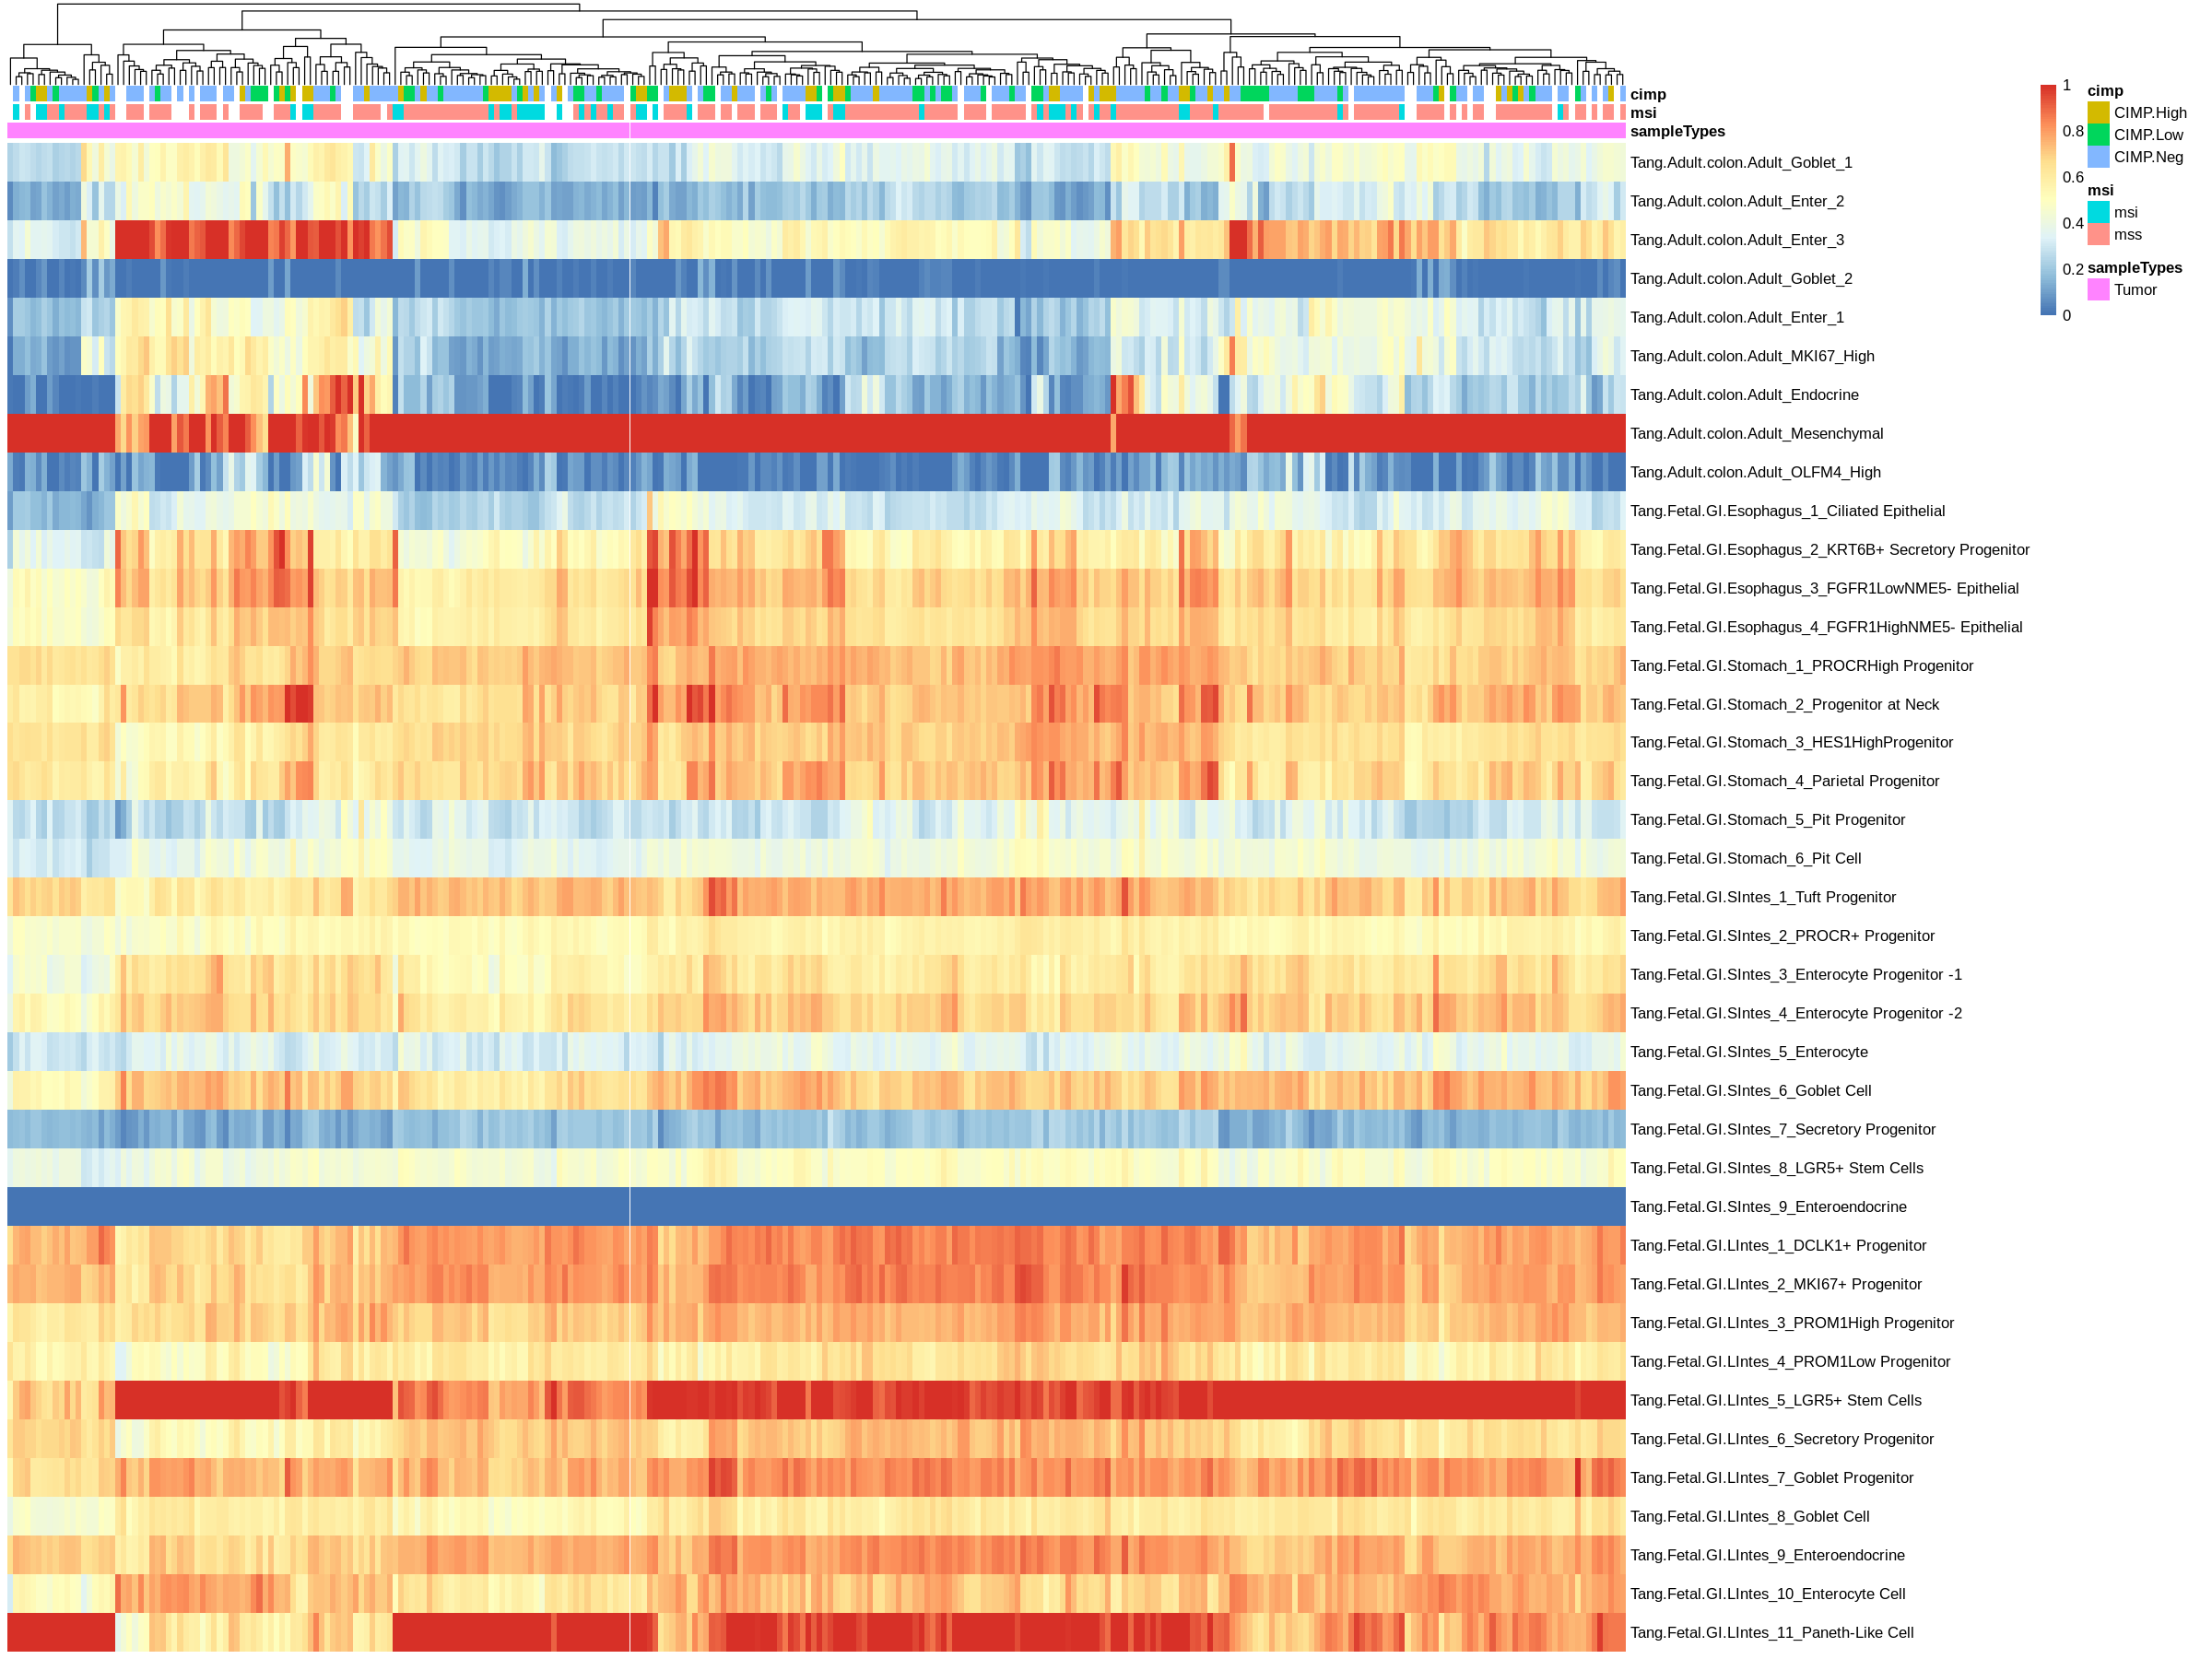

In [15]:
# CutTree2.Cuting_test_data.R
### Step1.Figure out the most appropriate dissimilarity measure 
hclust.Res <- hclust(dist(t(Trans.Rang1.cv2500_colon_InNormal), method="euclidean"), method="complete")
## Not good for dist(): "maximum","canberra","binary"
## Good for dist():"euclidean"="minkowski">"manhattan"
options(repr.plot.width=20, repr.plot.height=15)
Cluster.Res <- pheatmap::pheatmap(Trans.Rang1.cv2500_colon_InNormal,annotation_col = COAD.pheno.tumor,
                                  cluster_cols = hclust.Res,
                                  show_colnames = F,cluster_rows = F,scale = "none")

Loading required package: pheatmap
Loading required package: survminer
Loading required package: ggplot2
Loading required package: ggpubr
Loading required package: magrittr
Loading required package: survival


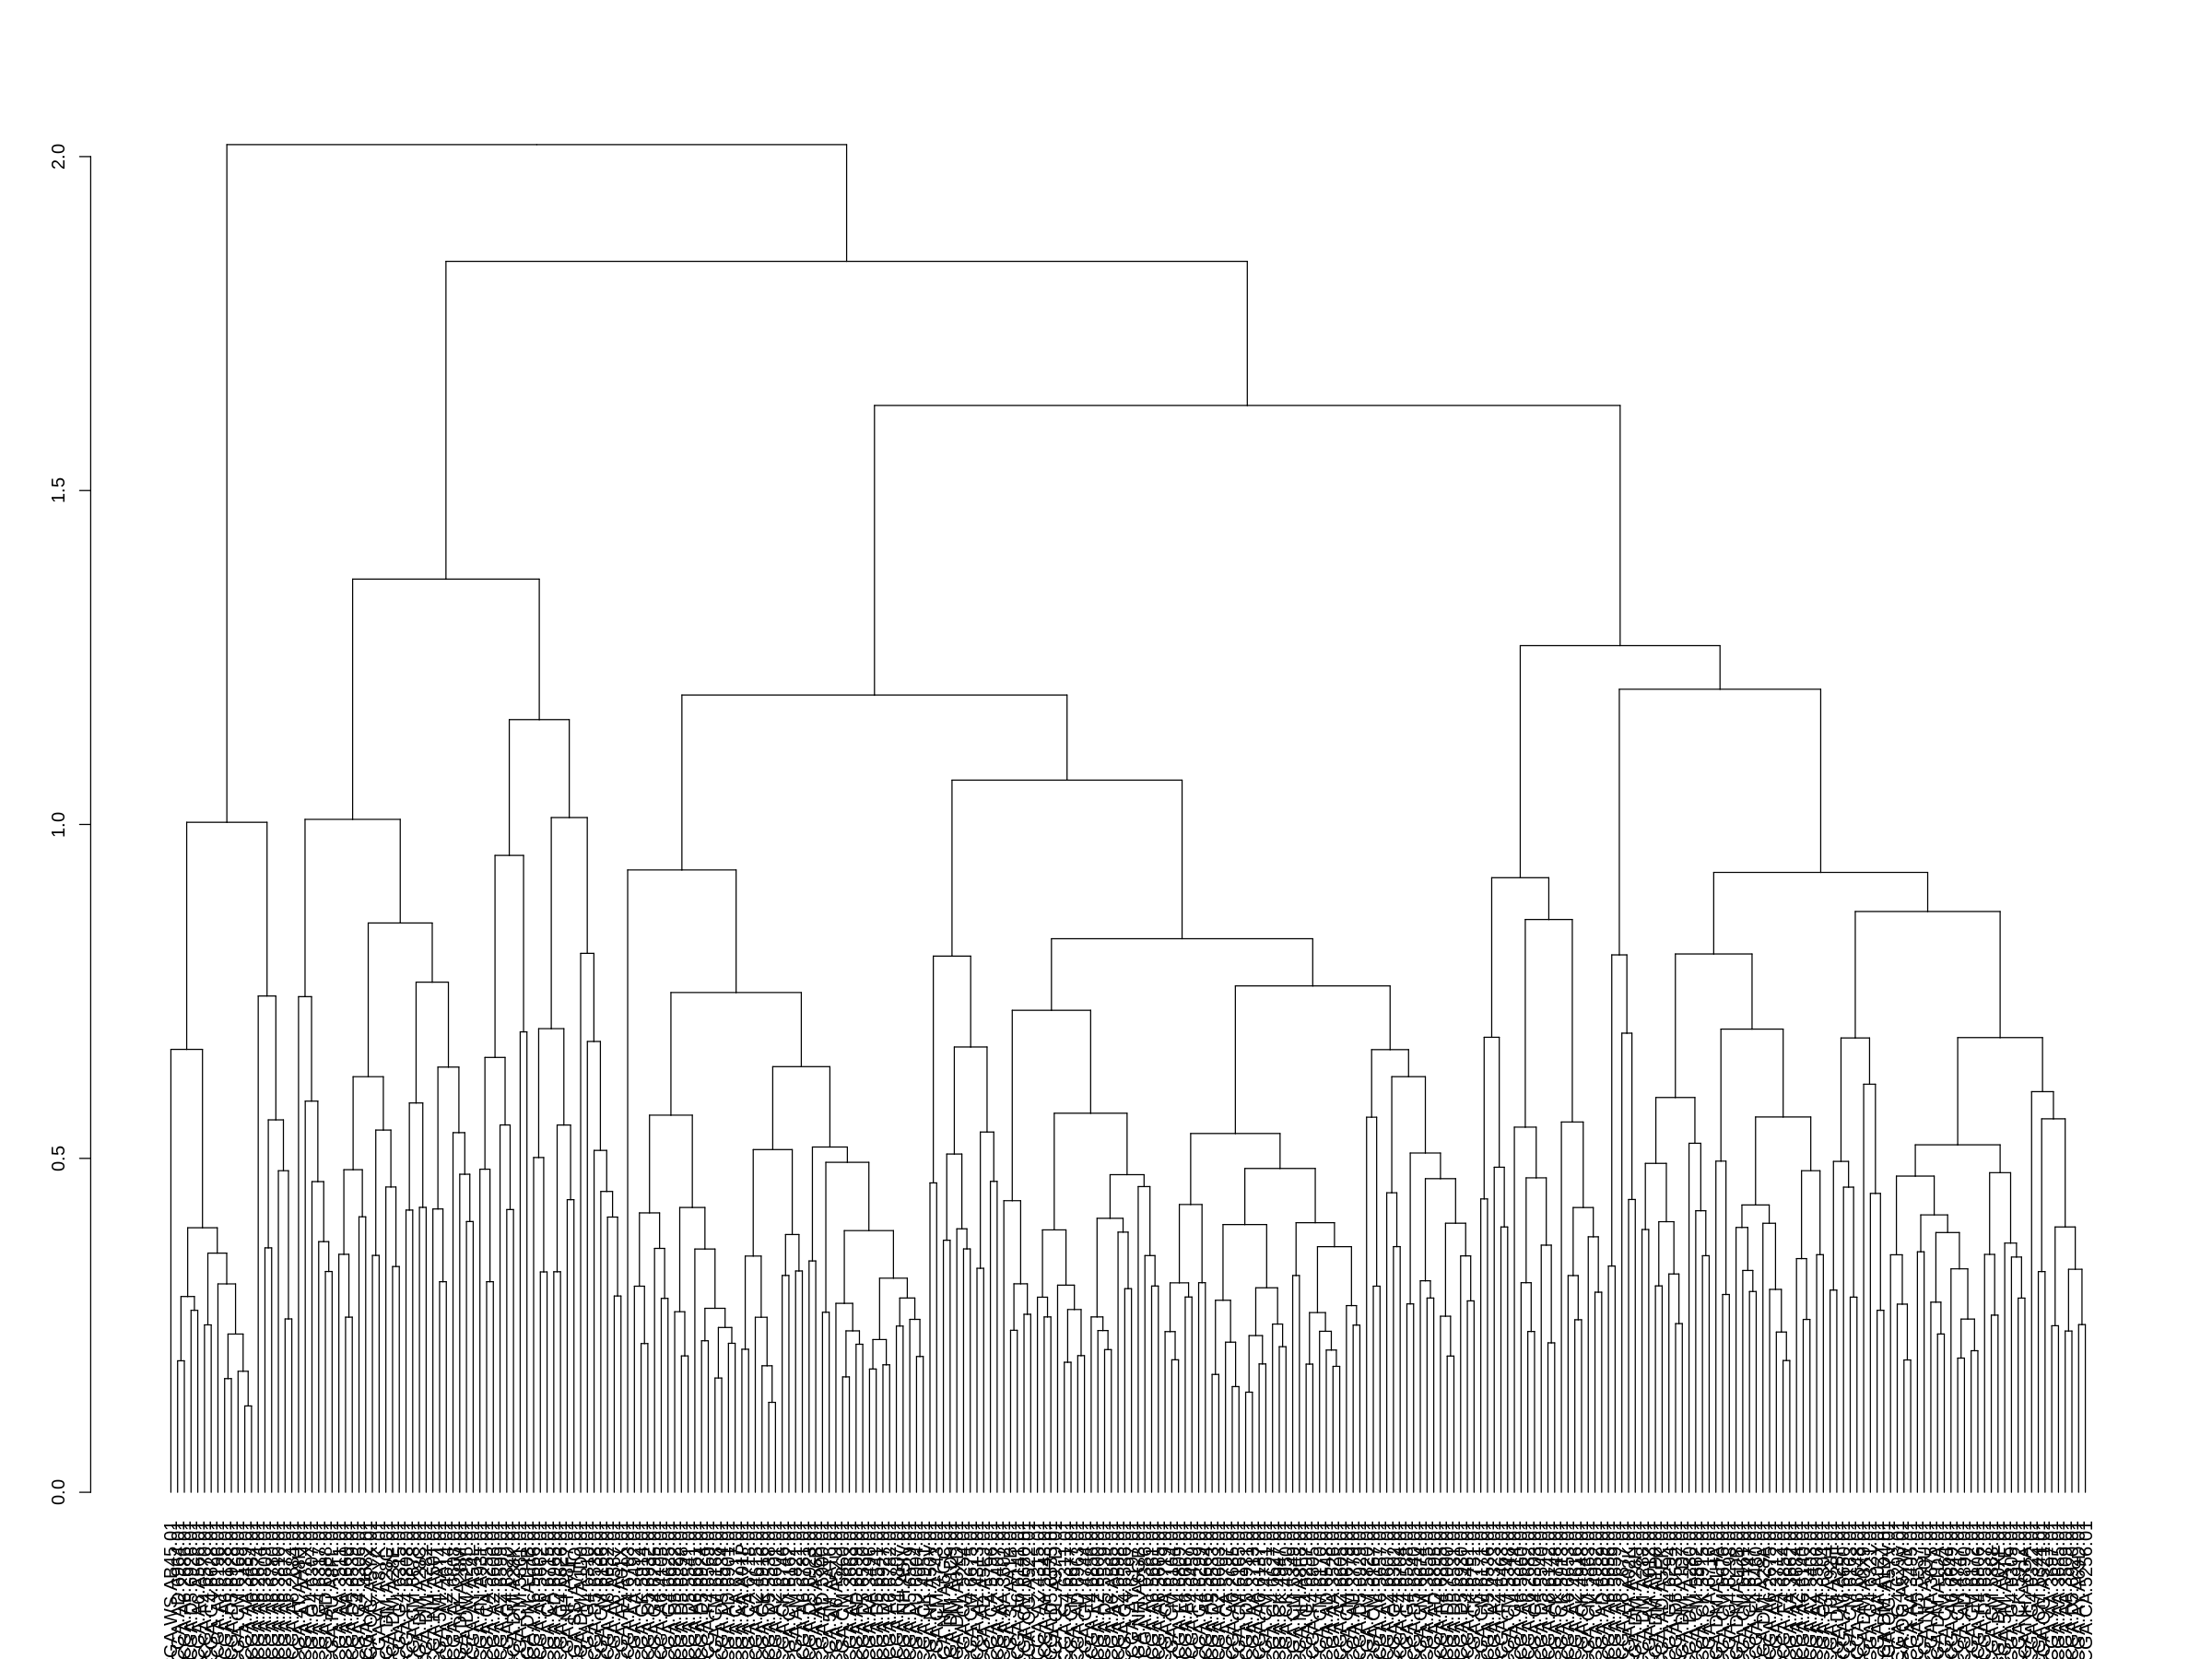

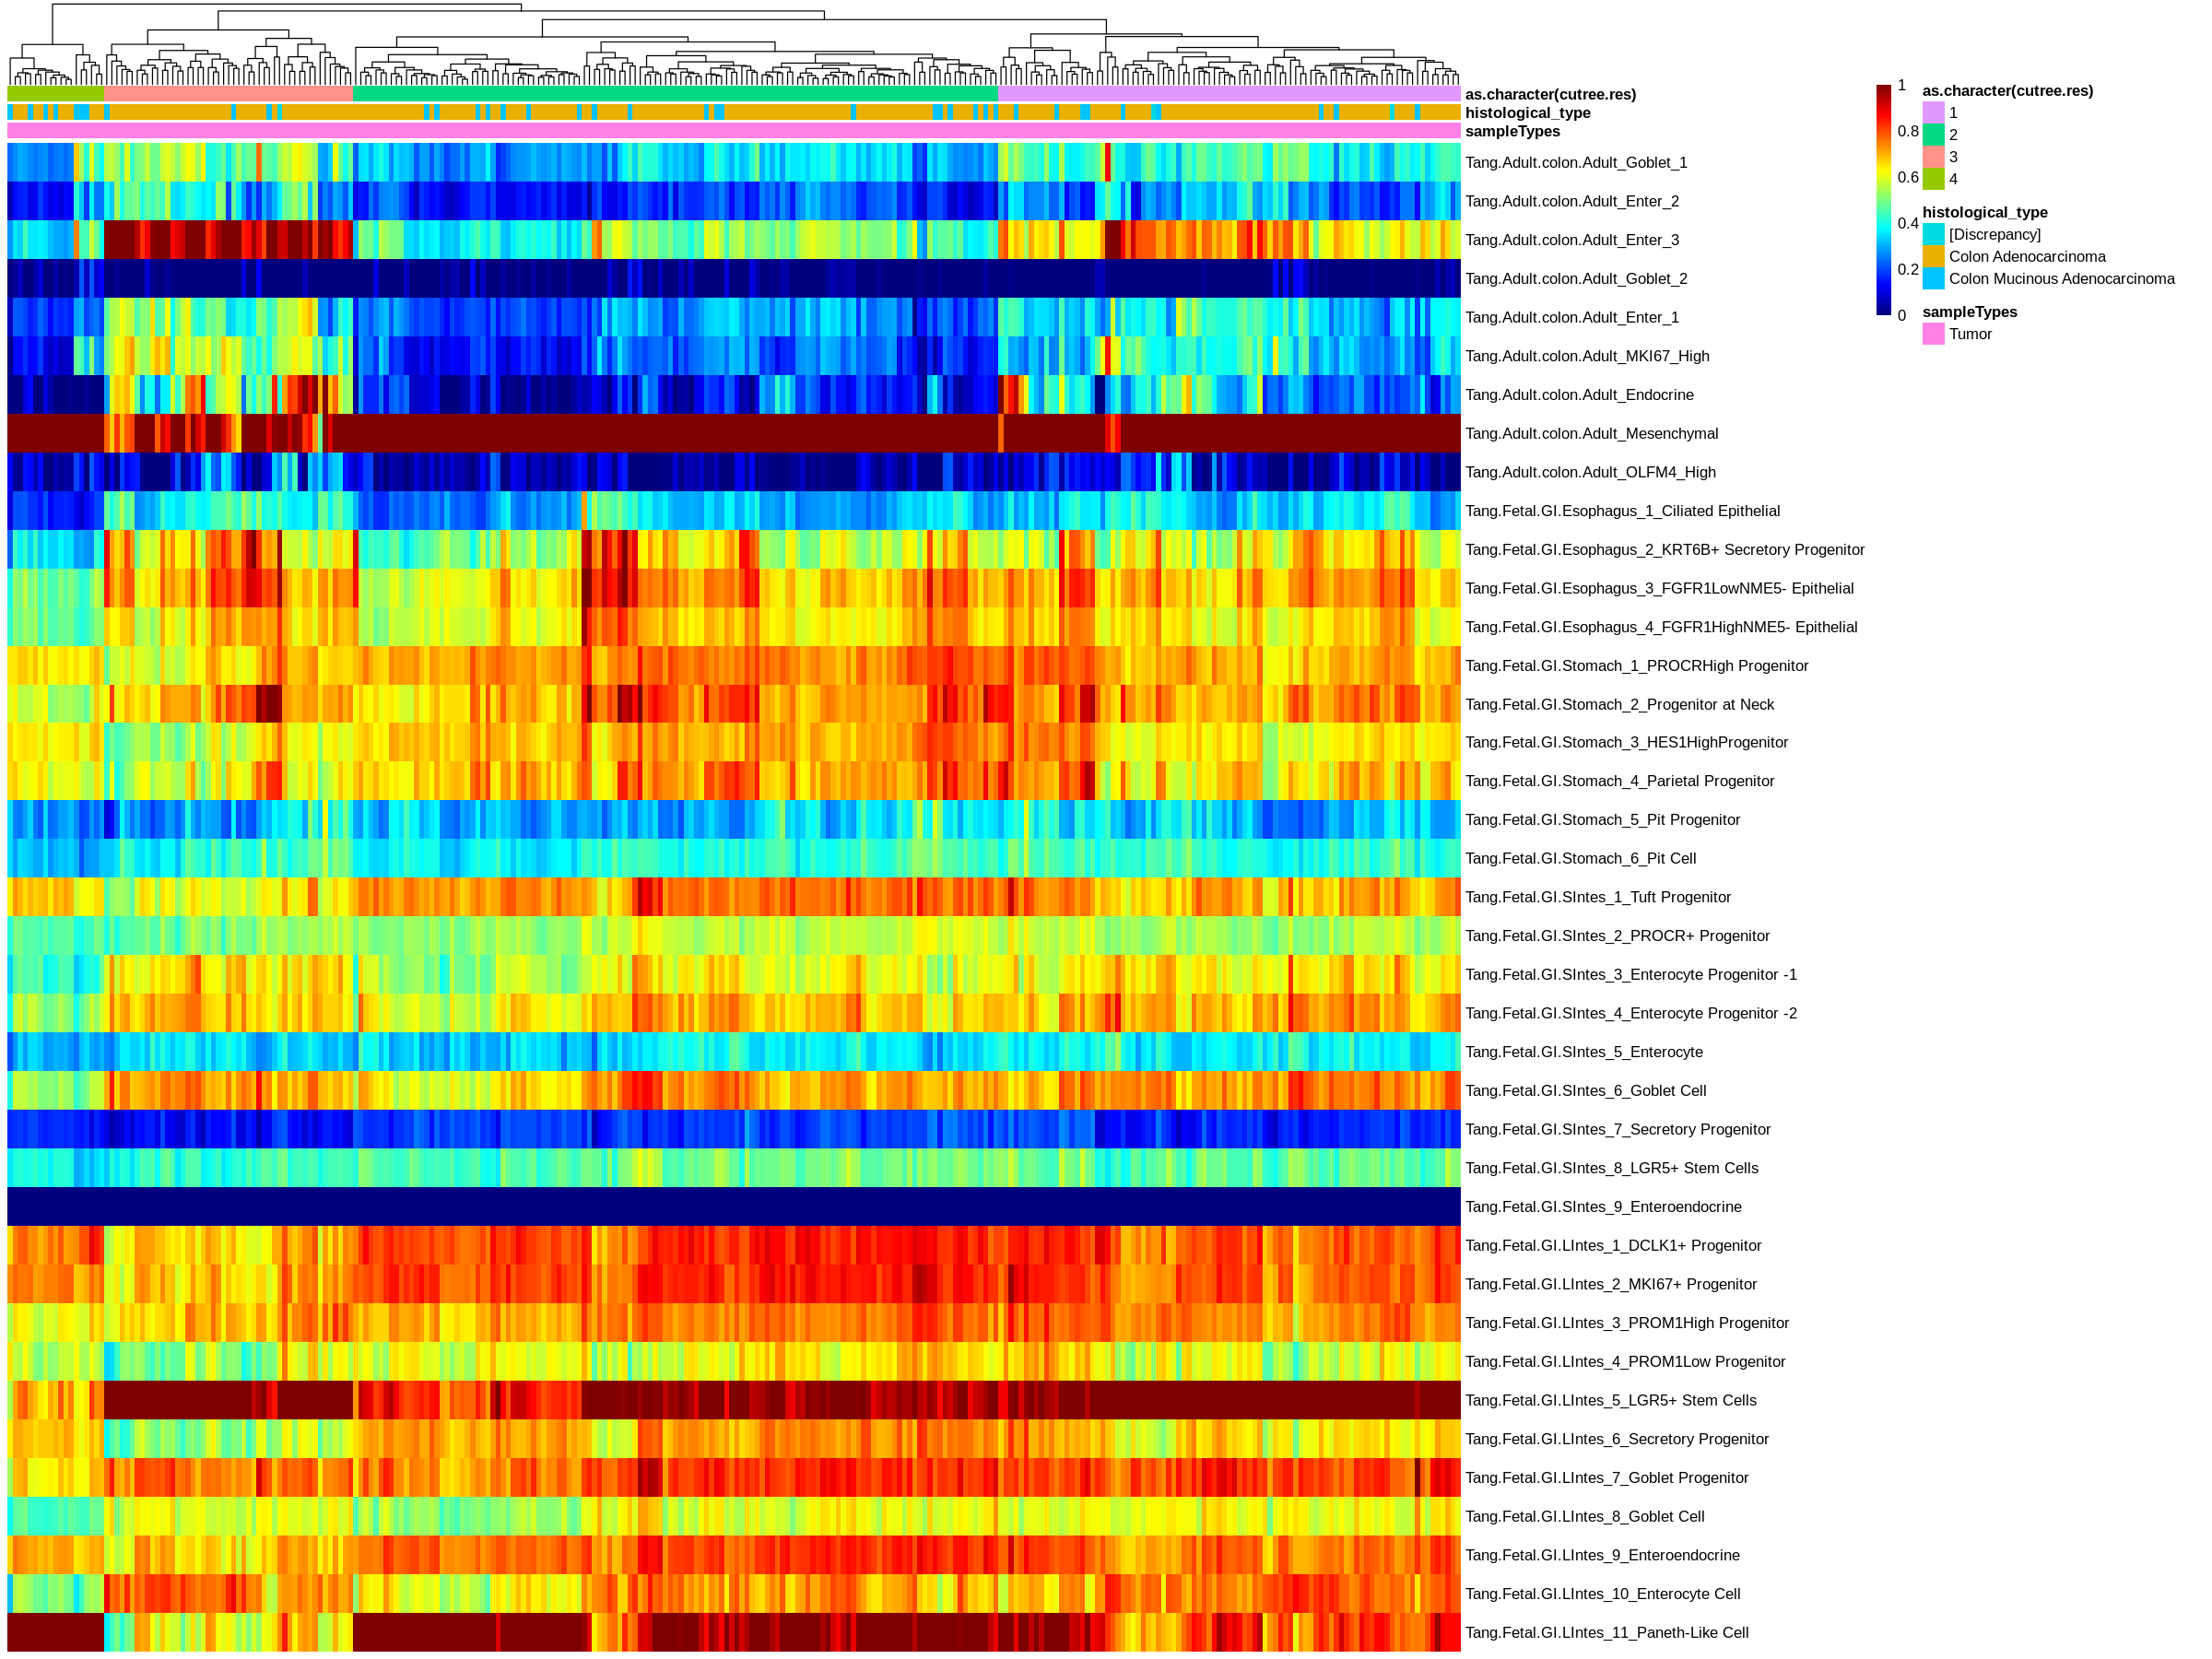

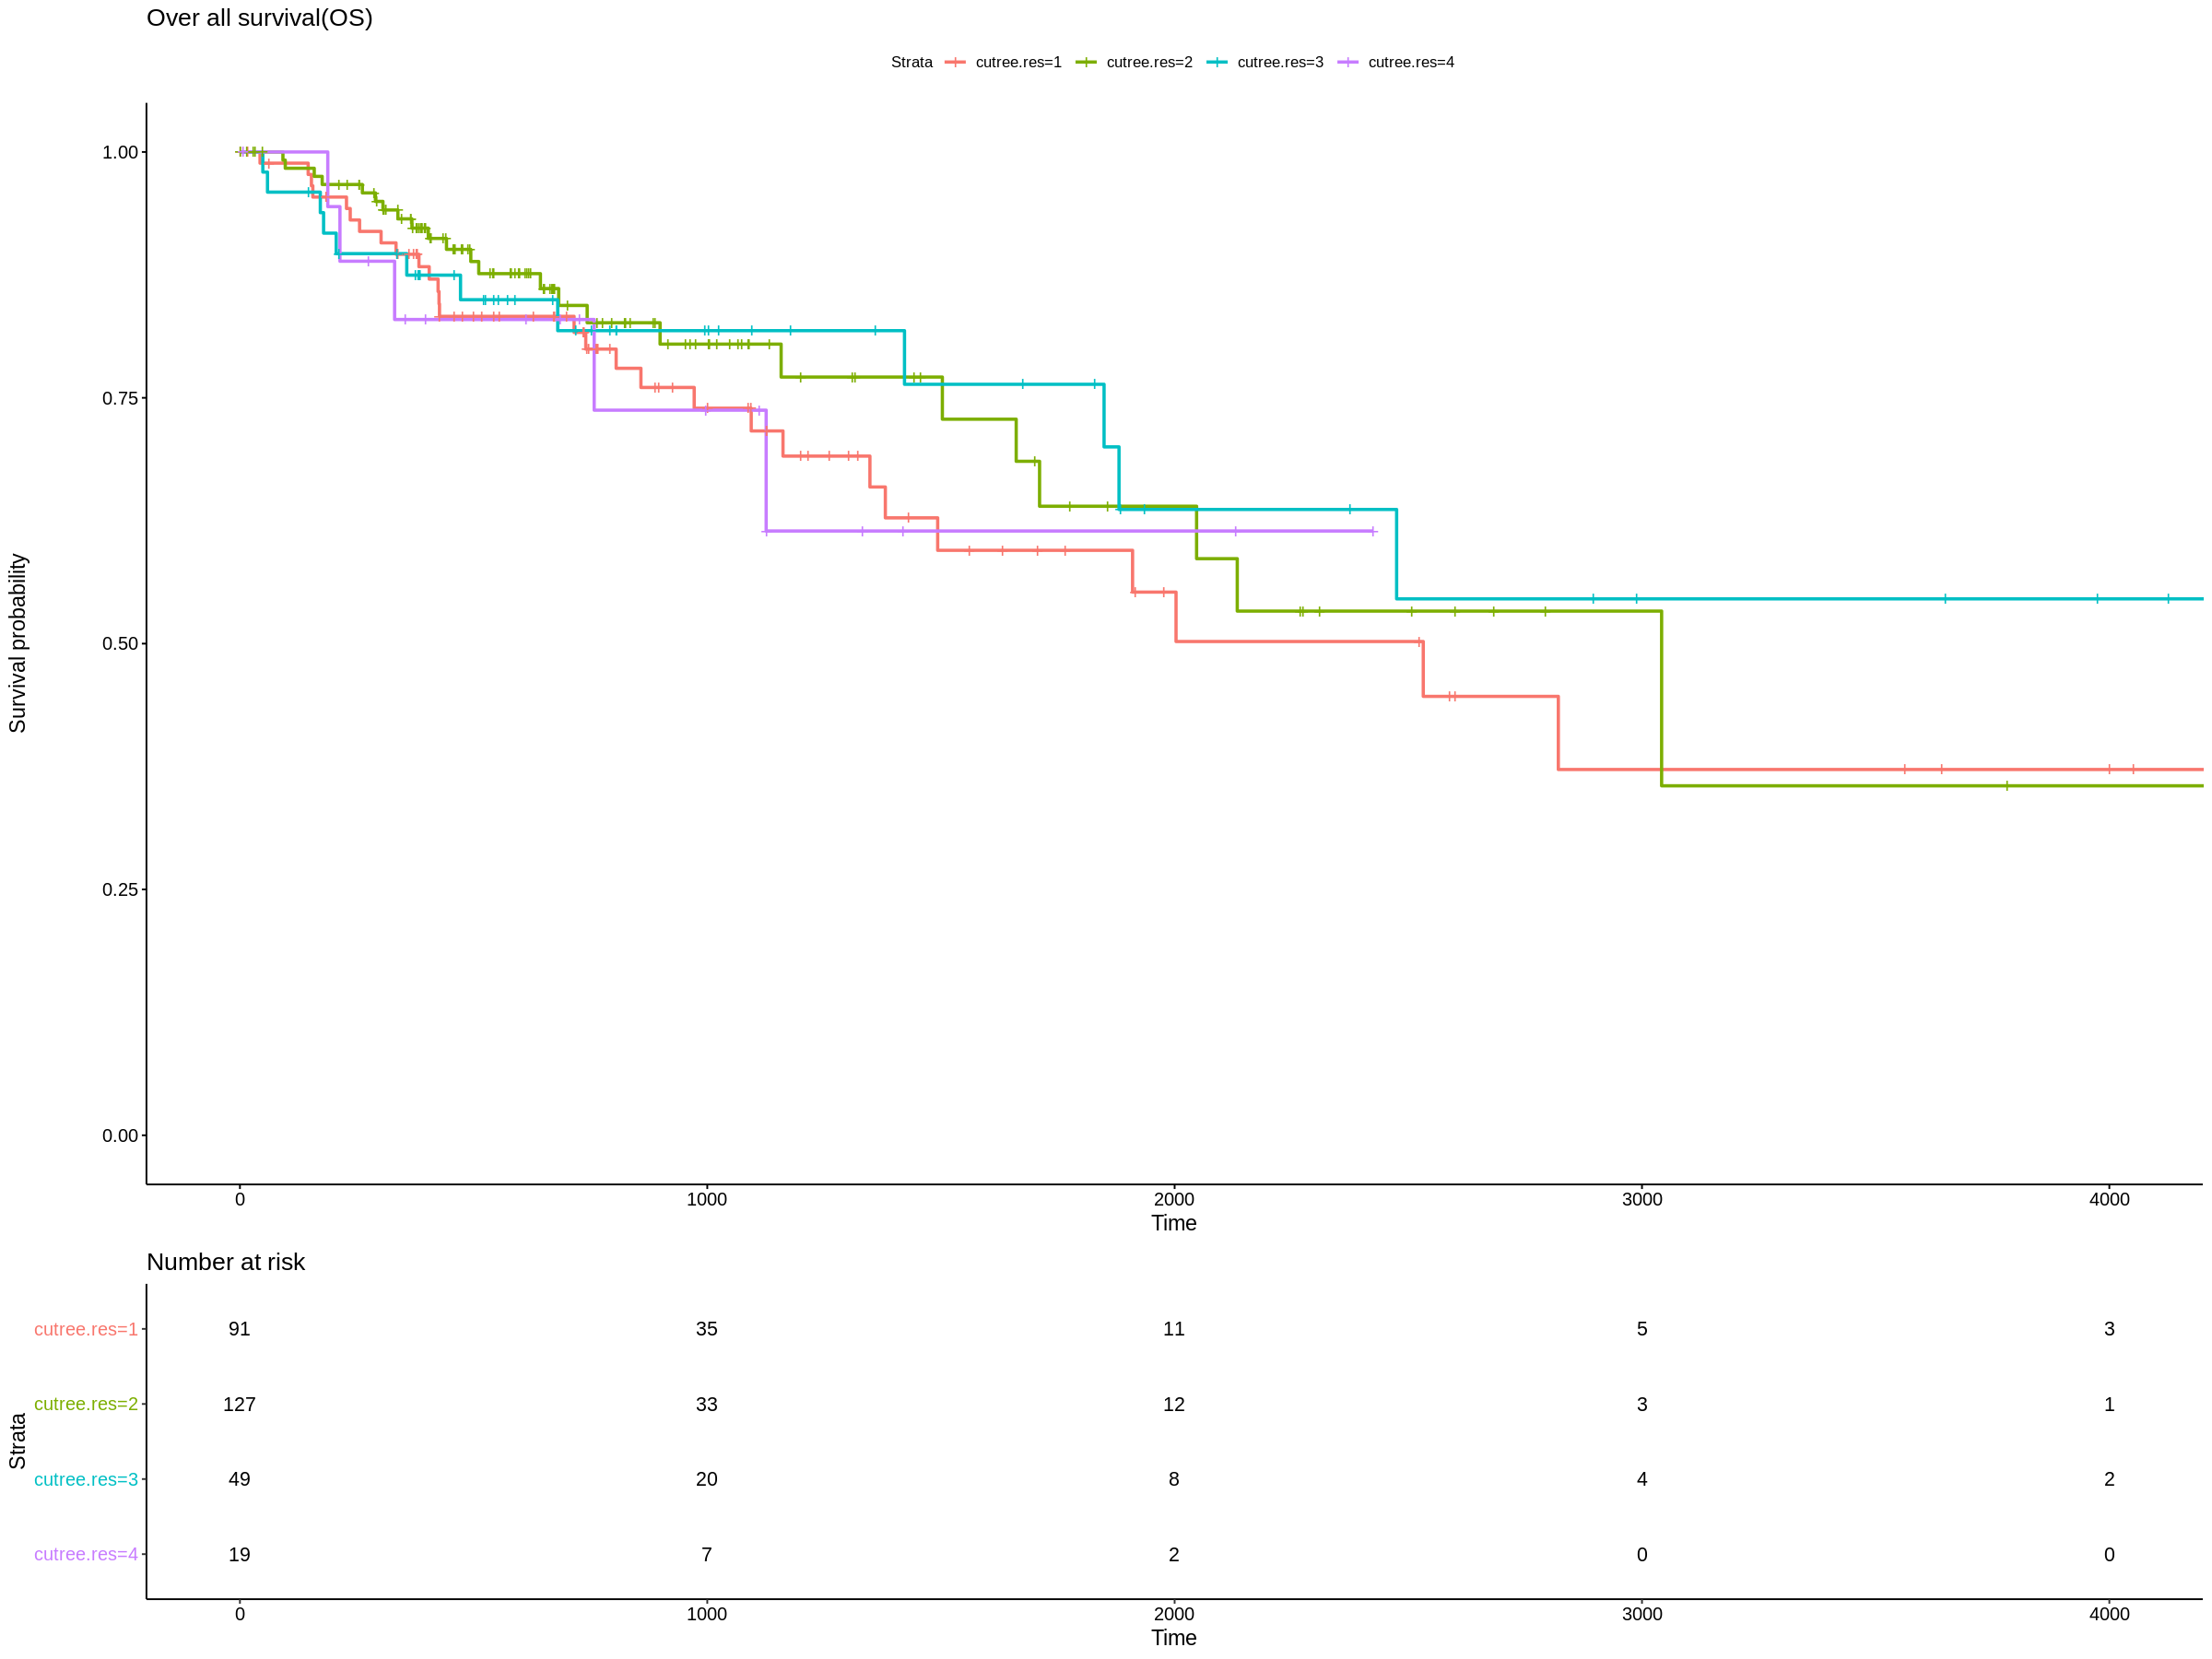

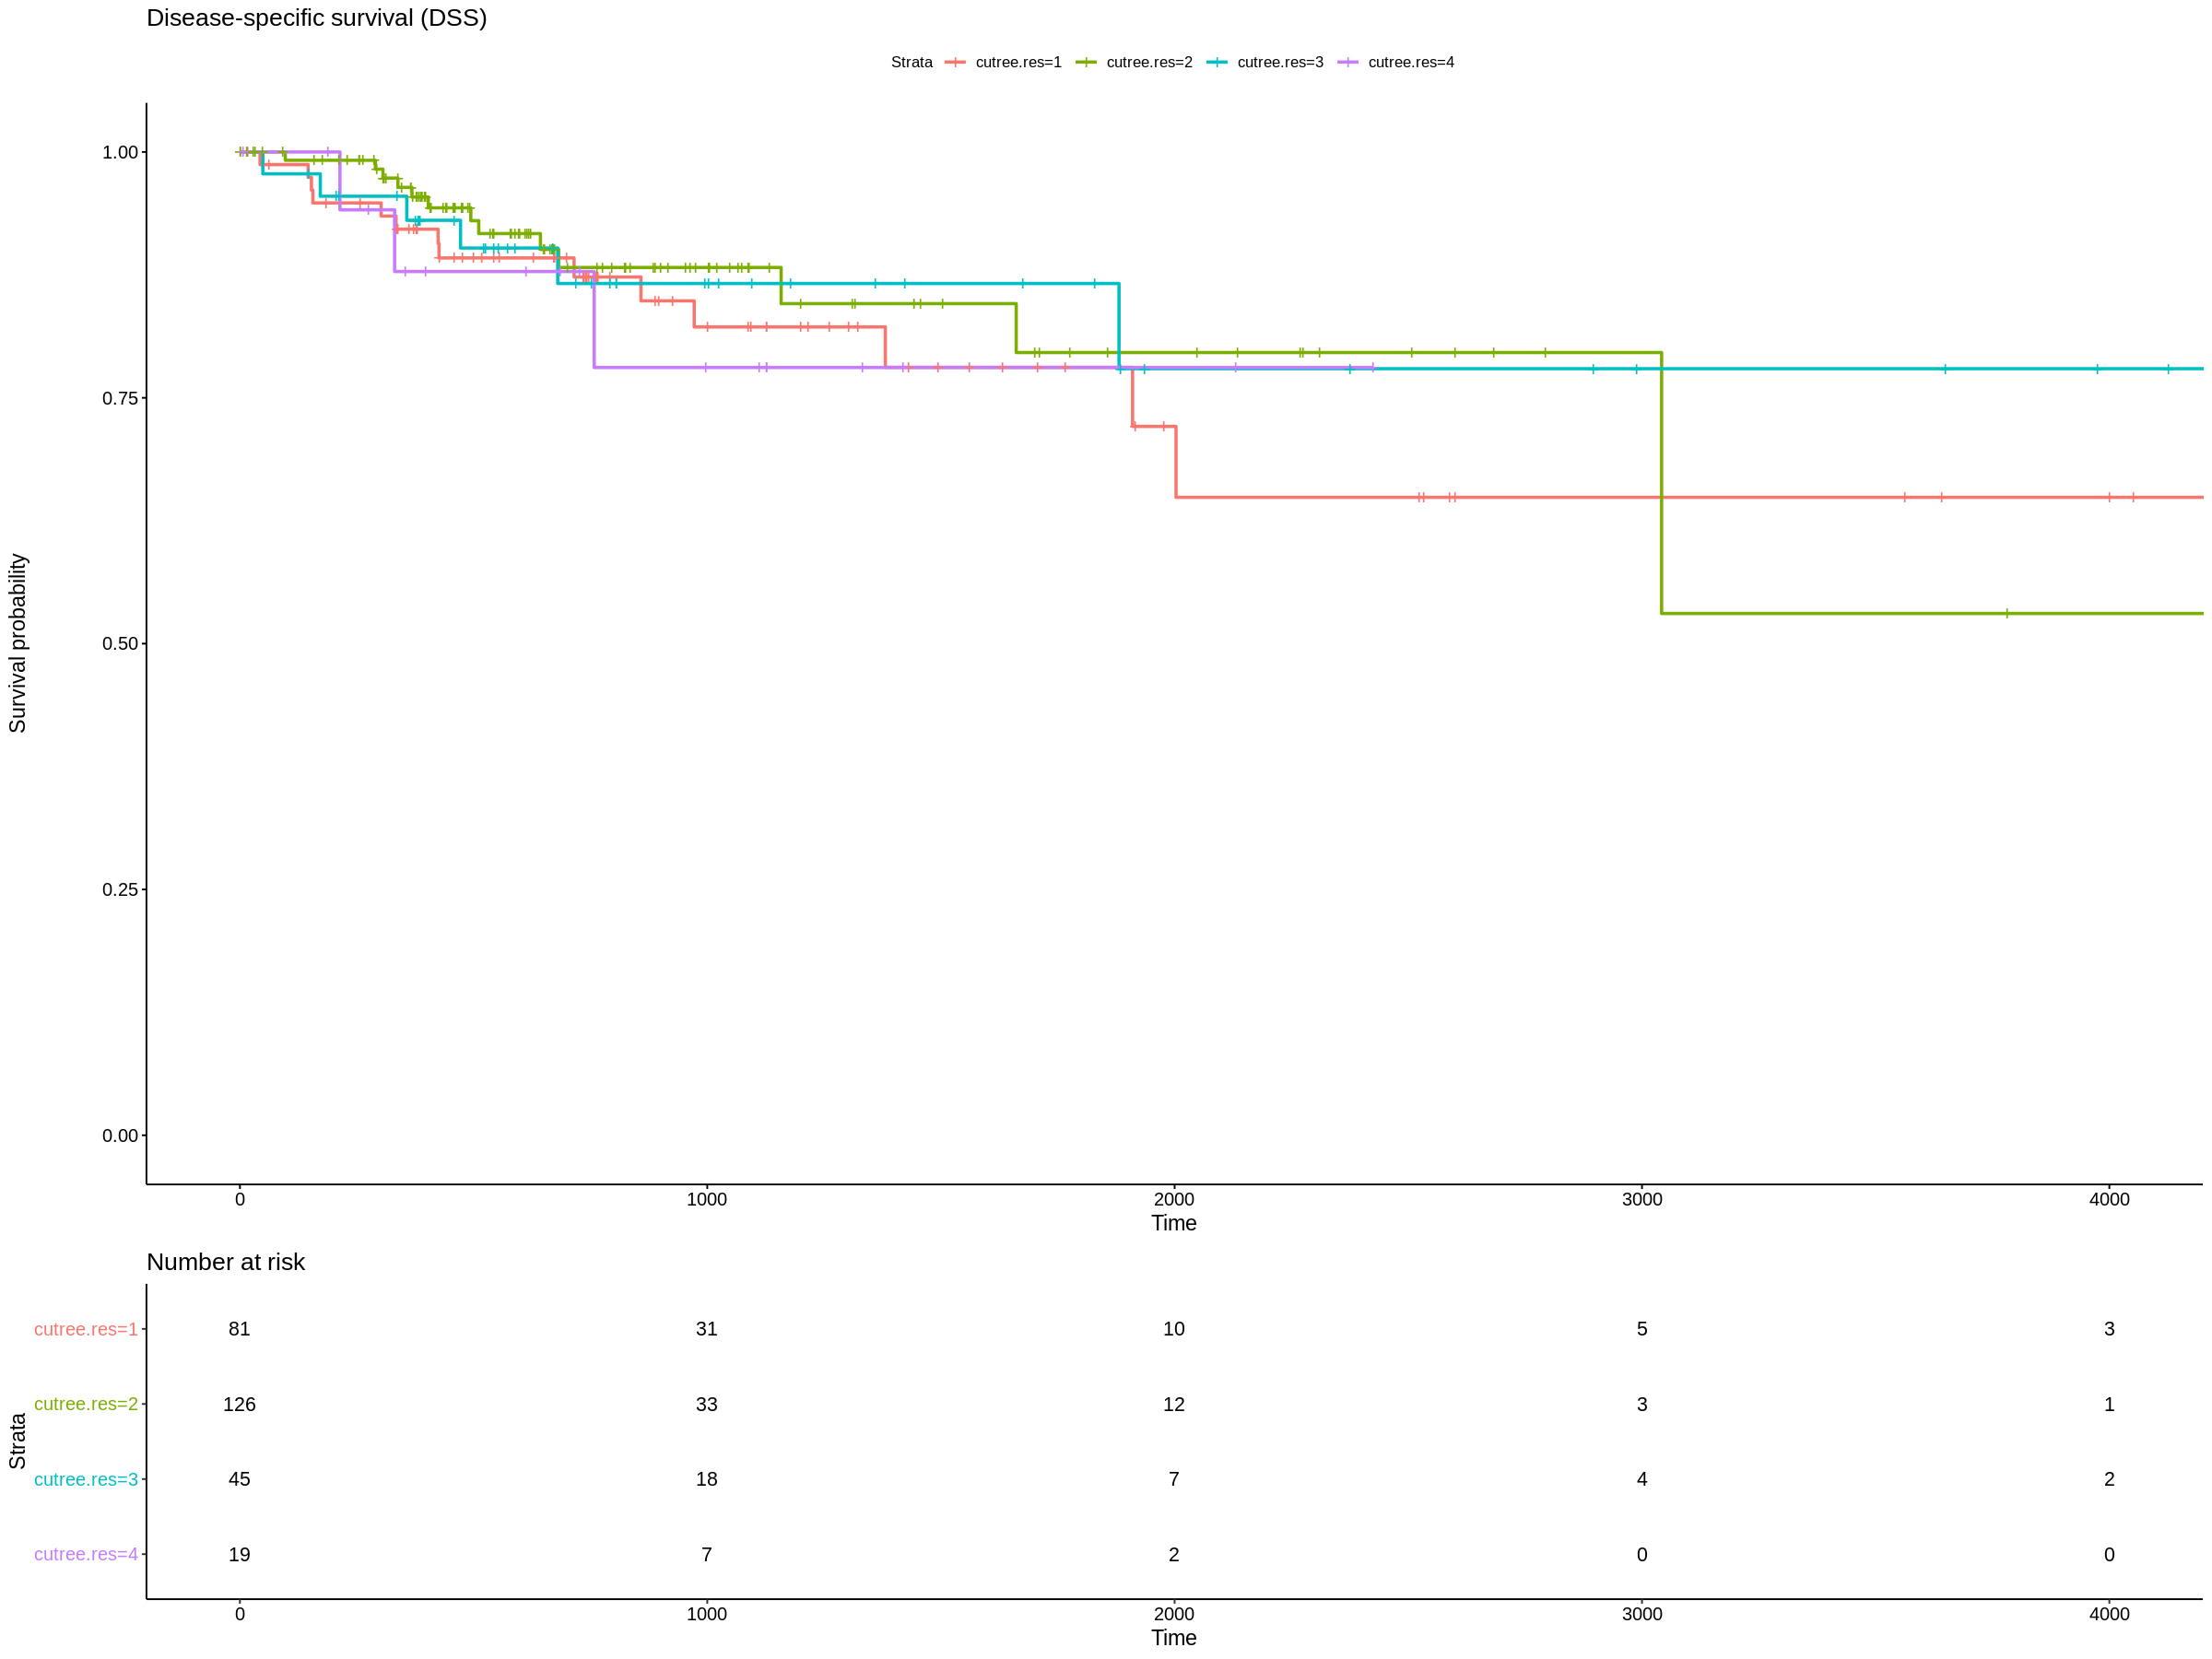

[[1]]

[[2]]

[[3]]

[[4]]

attr(,"class")
[1] "list"            "ggsurvplot_list"

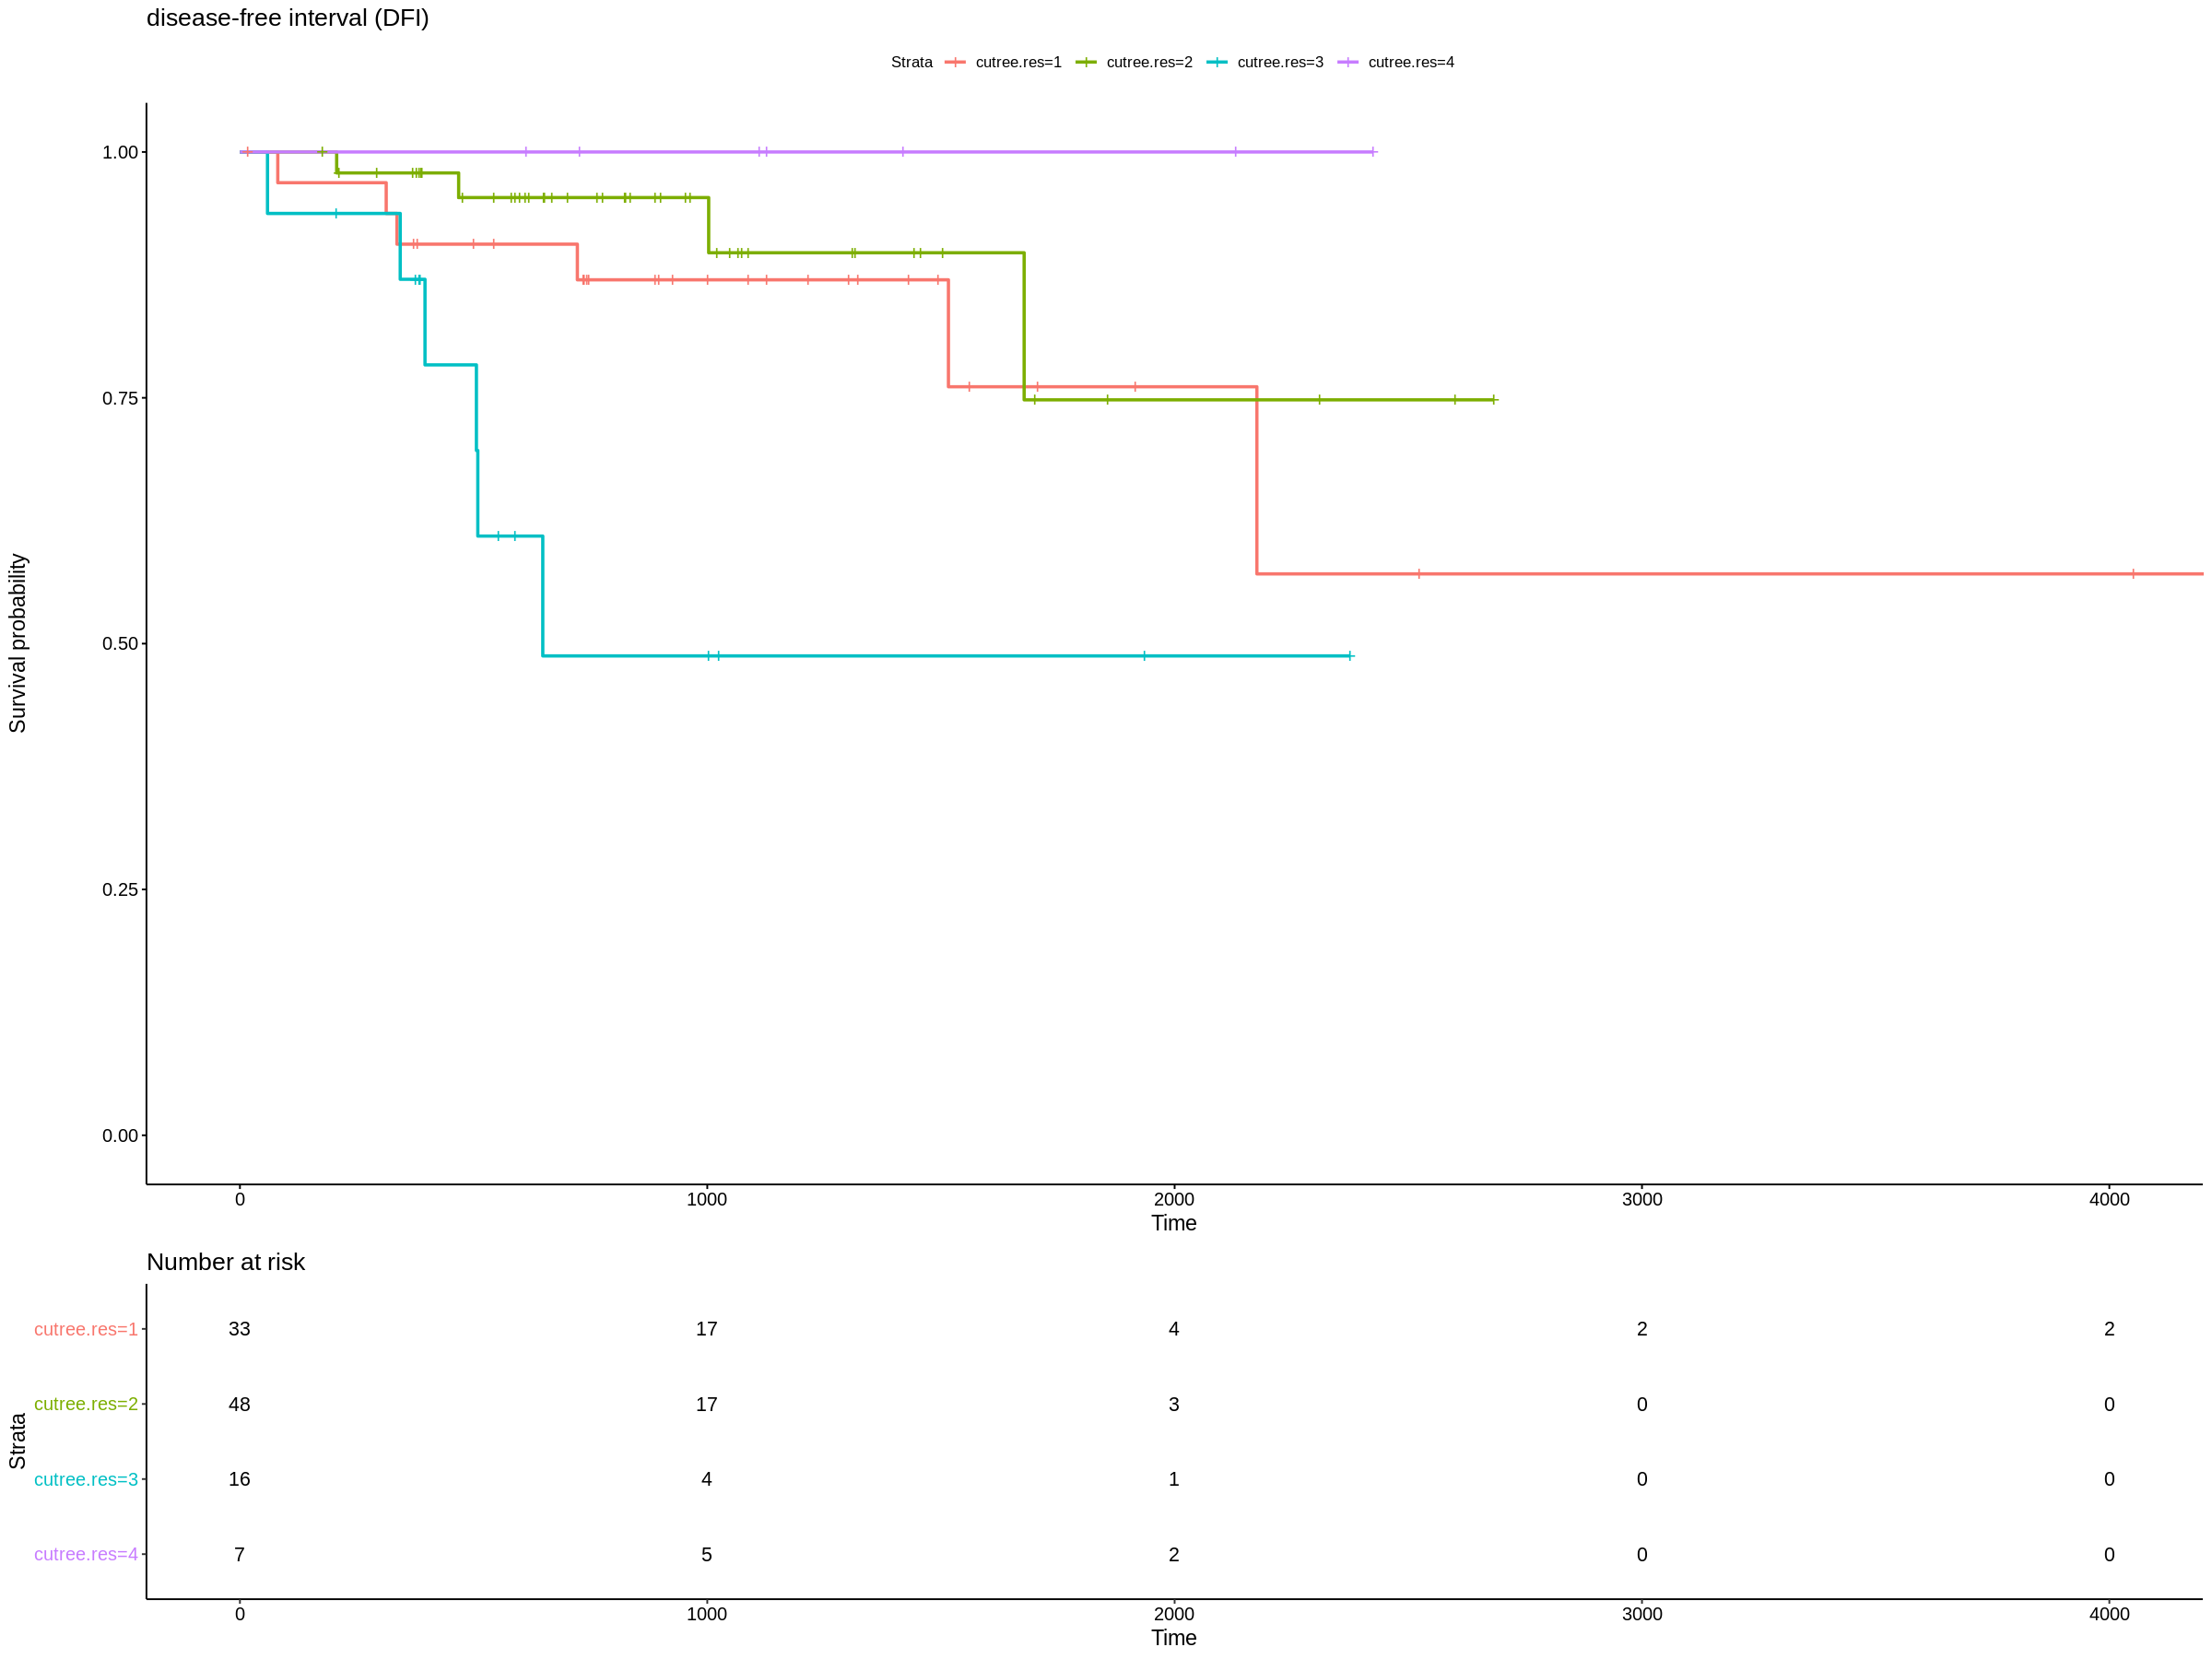

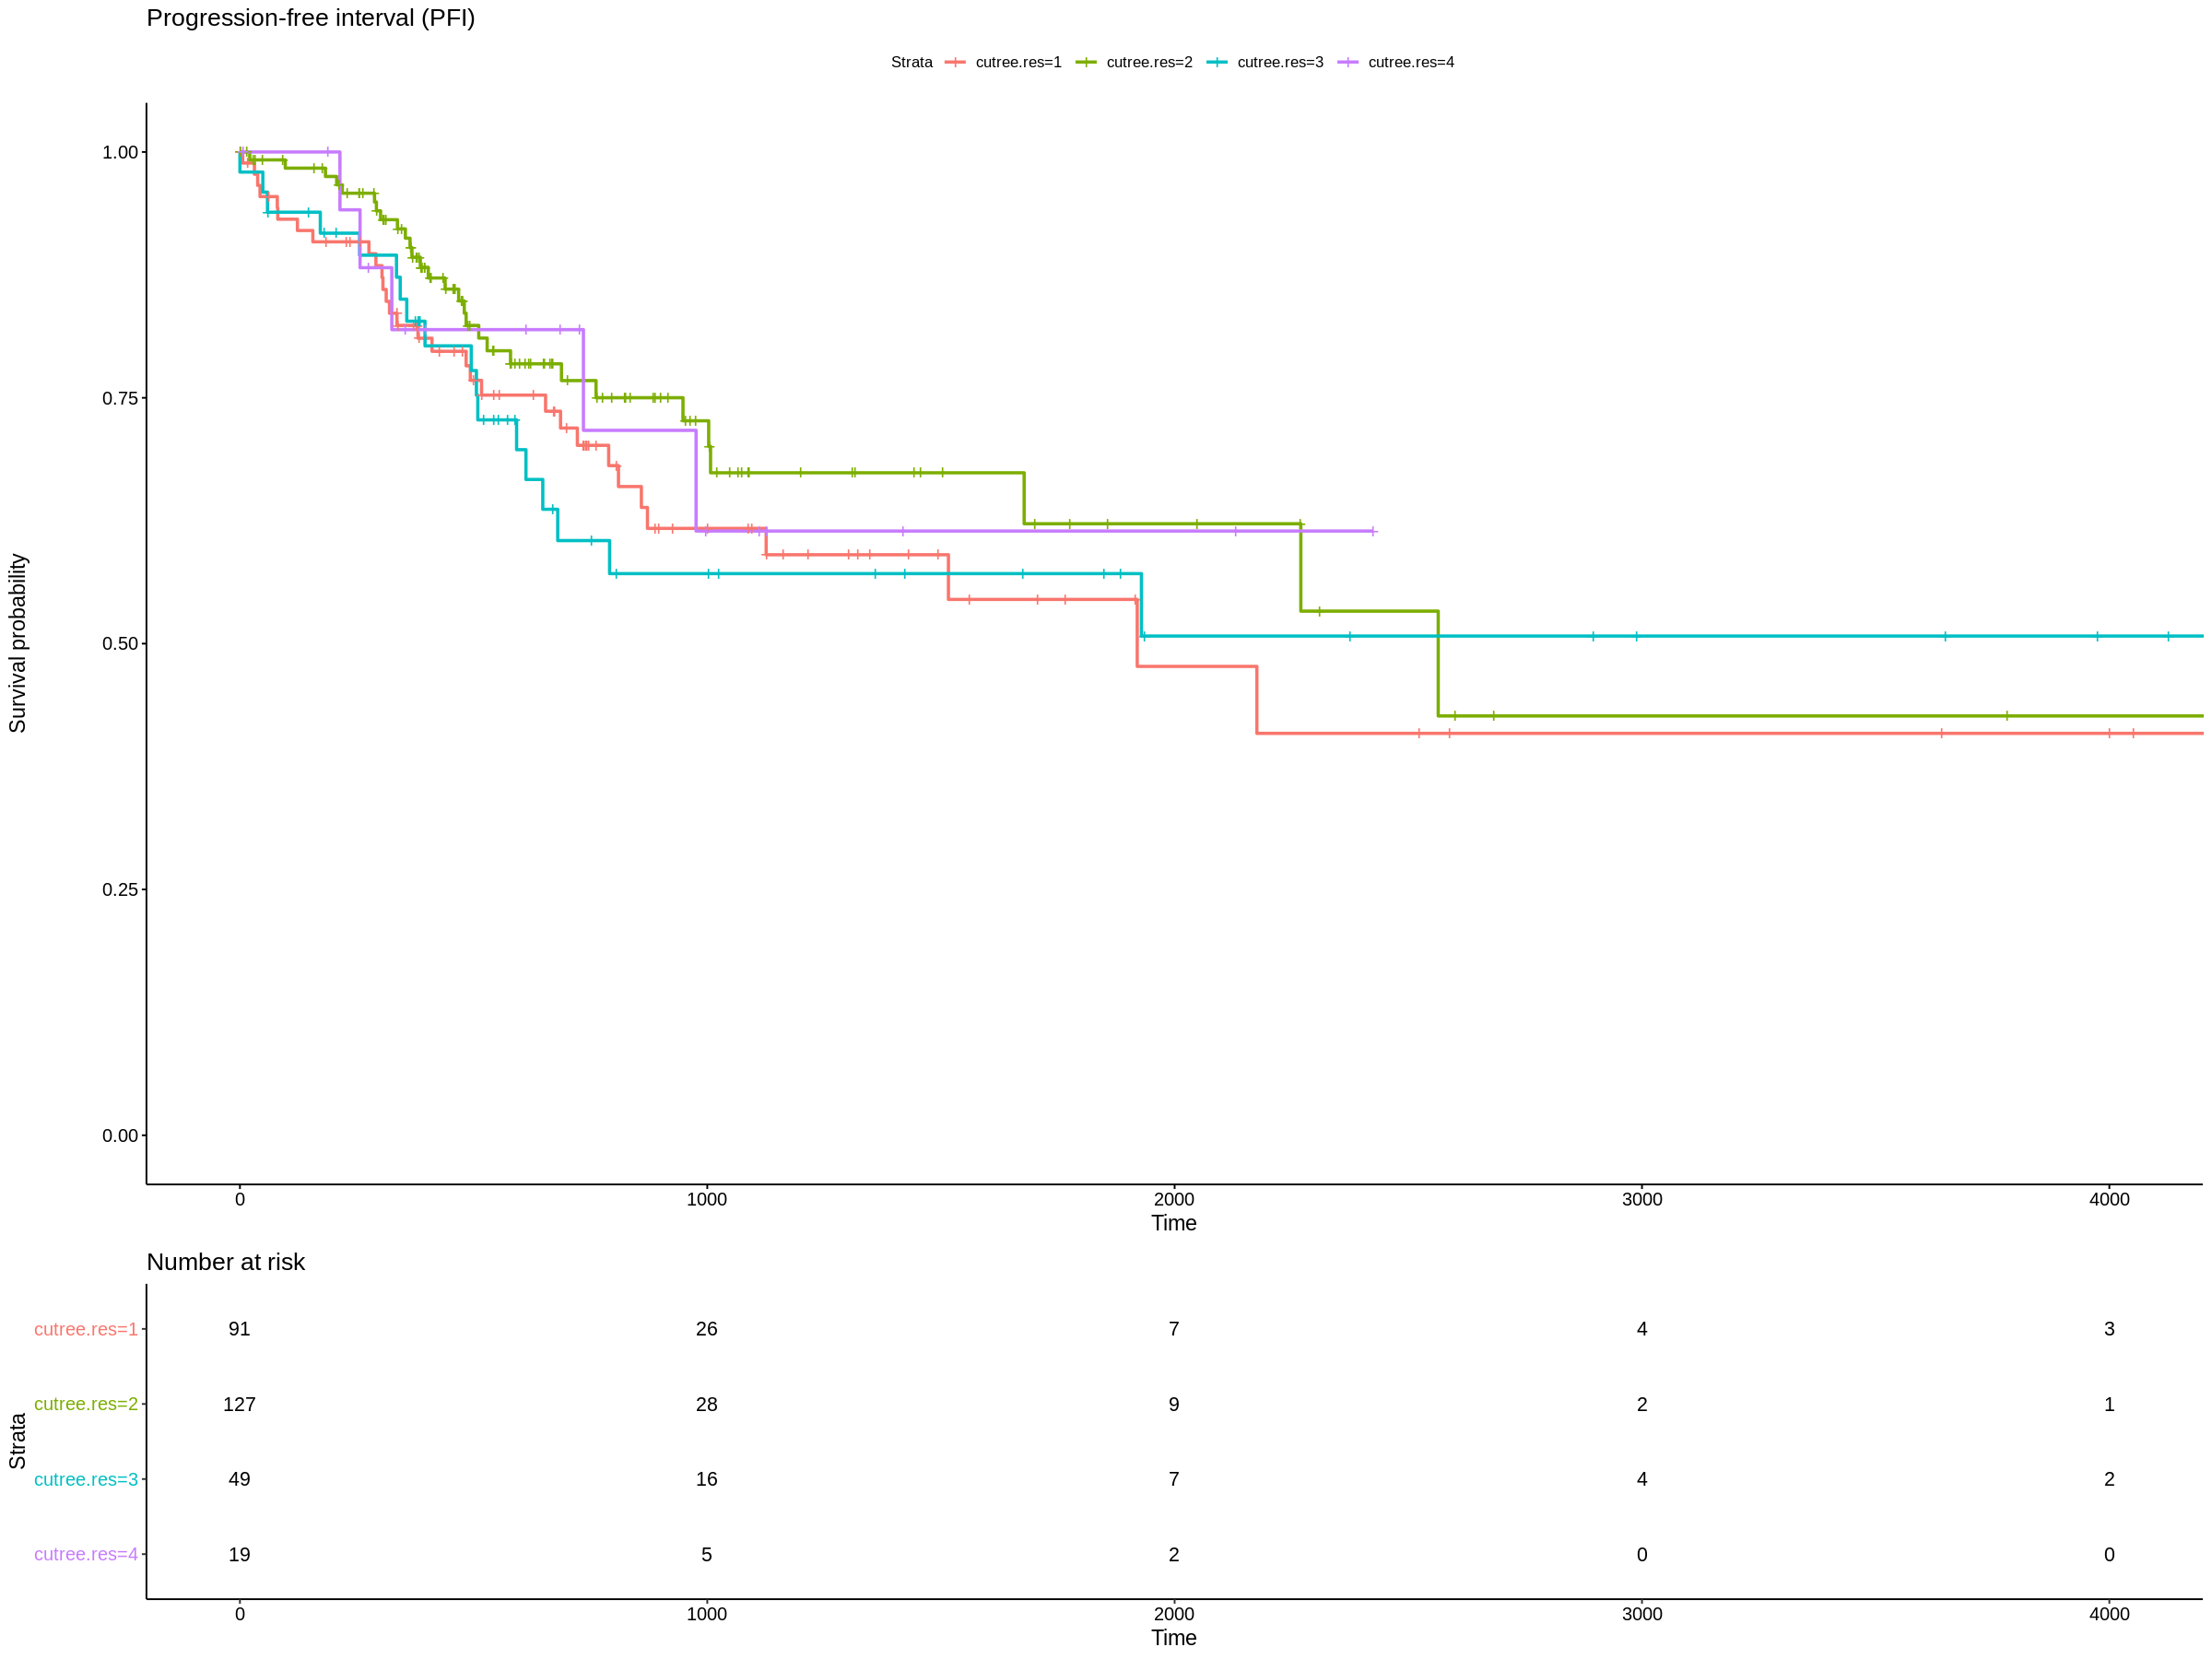

In [16]:
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Trans.Rang1.cv2500_colon_InNormal, hclust.res = hclust.Res, Col.anno = COAD.pheno[TumorID,], k = 4)


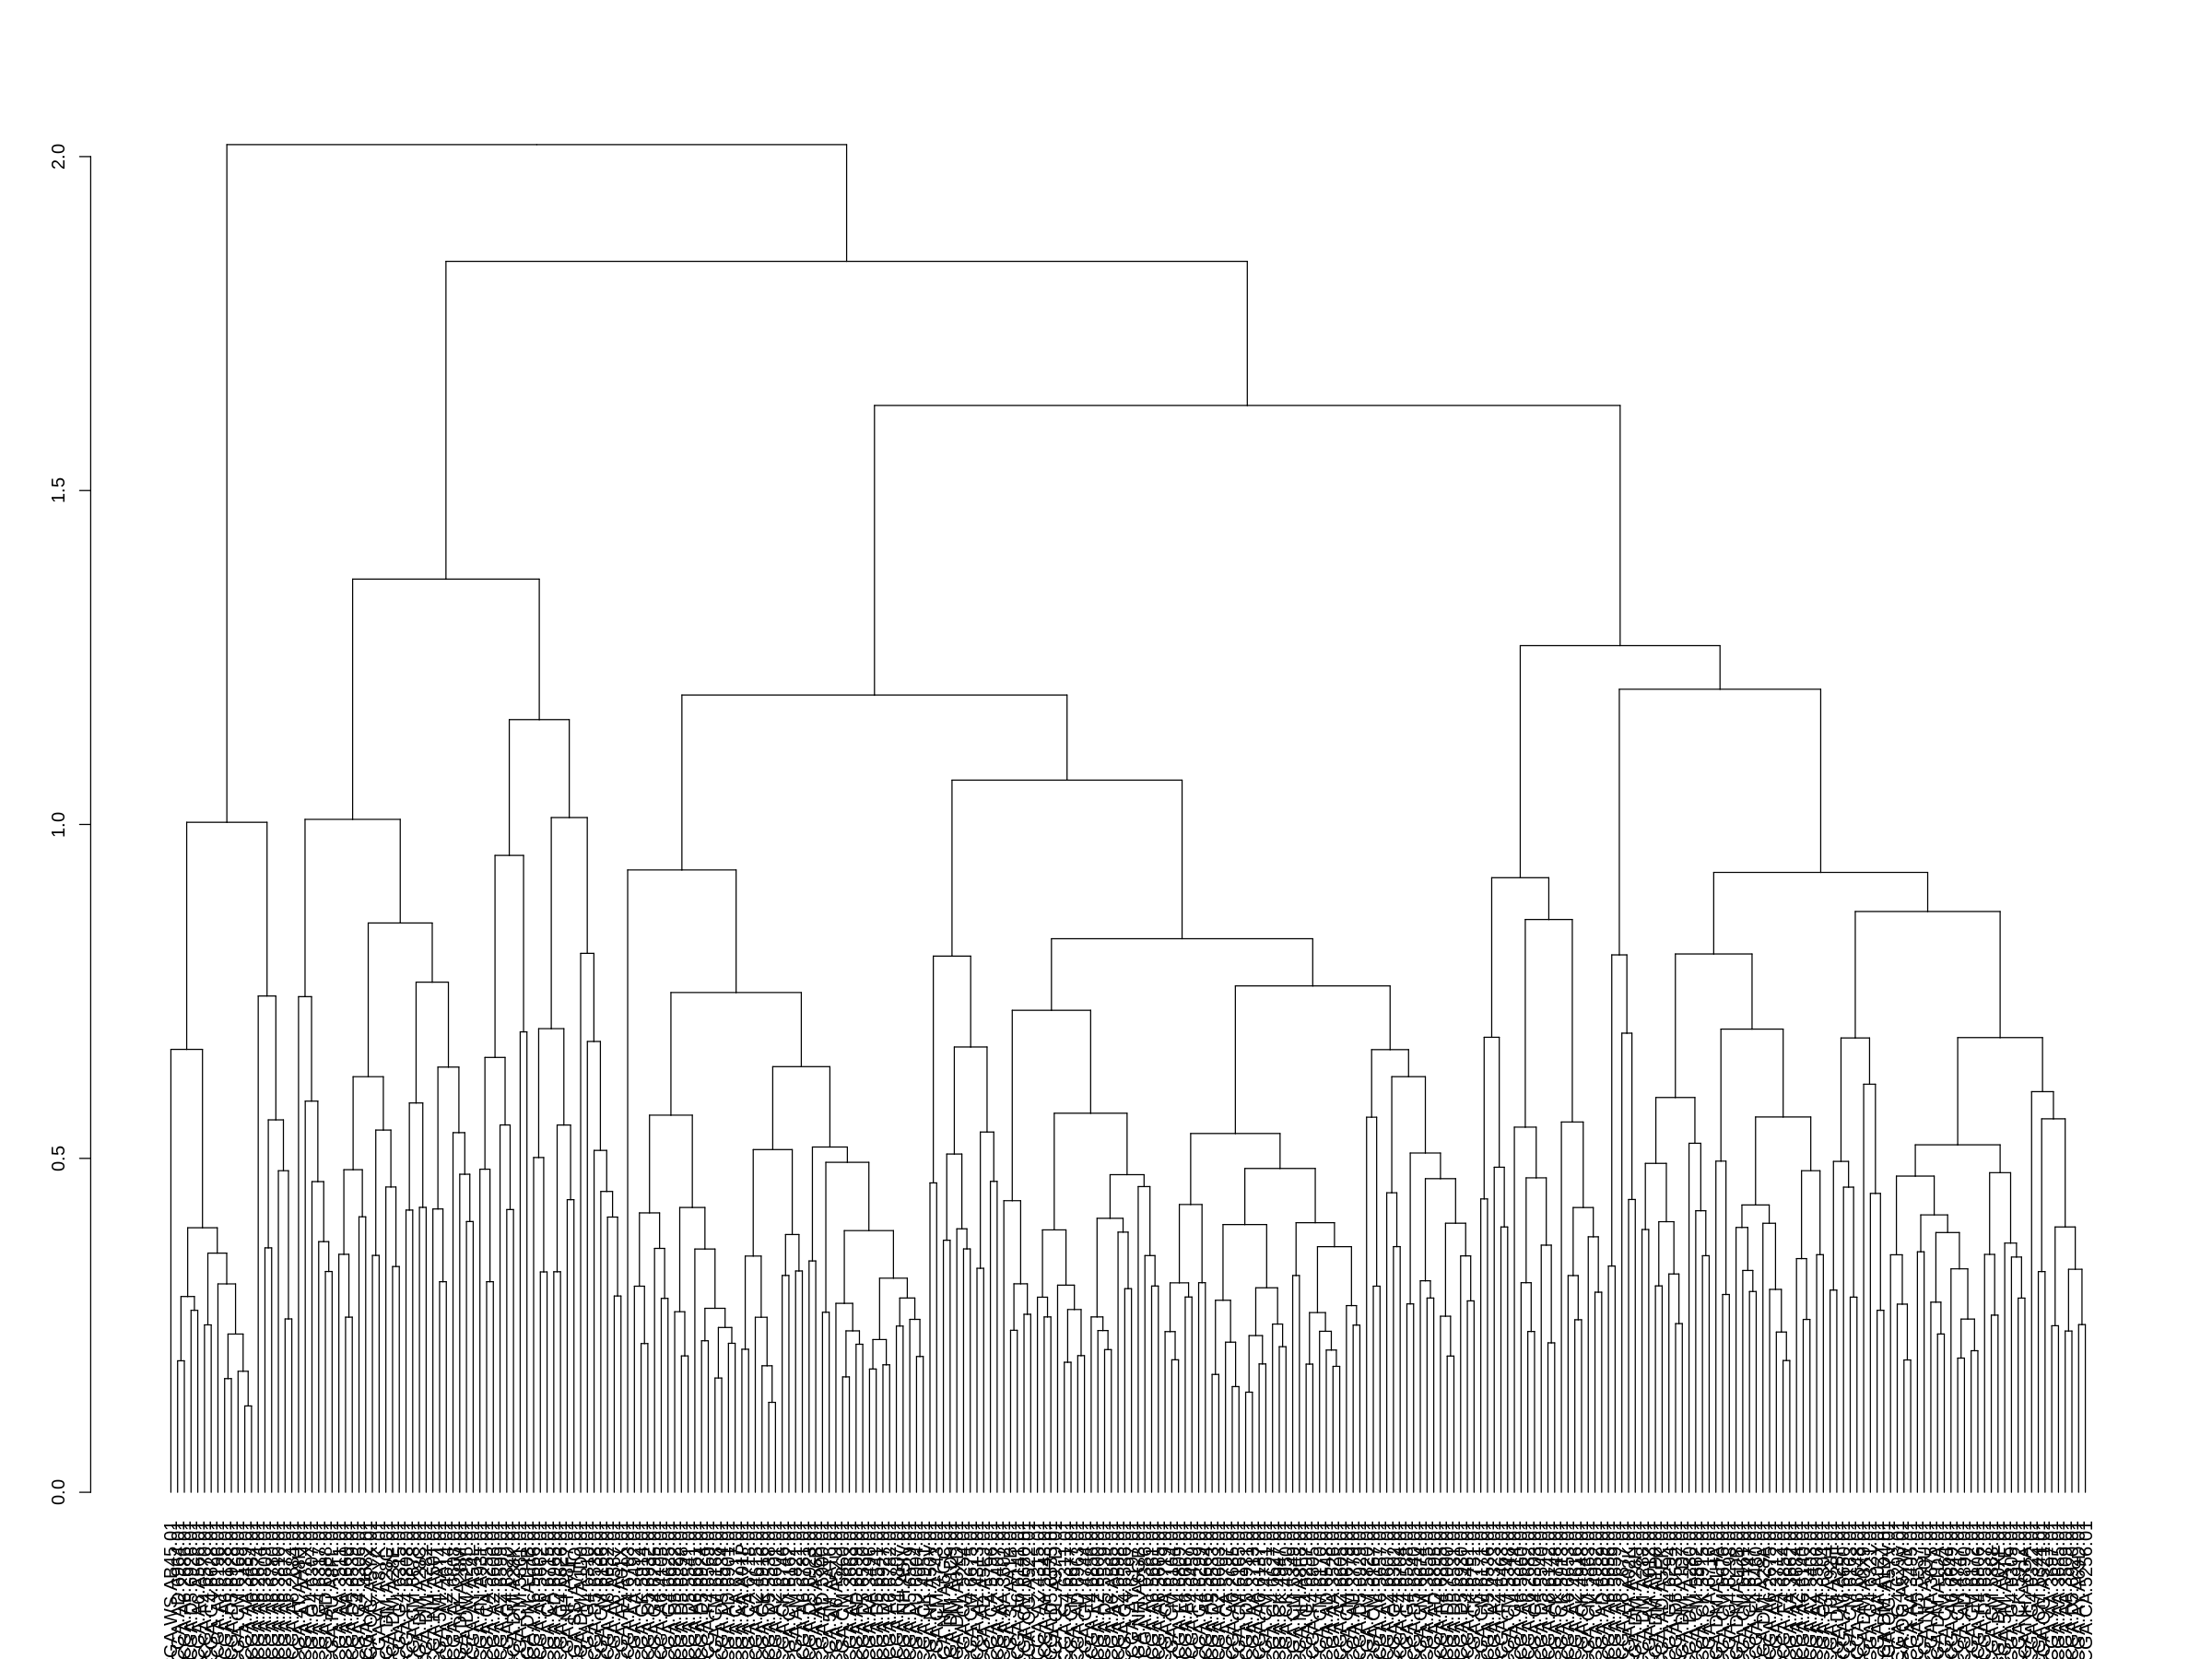

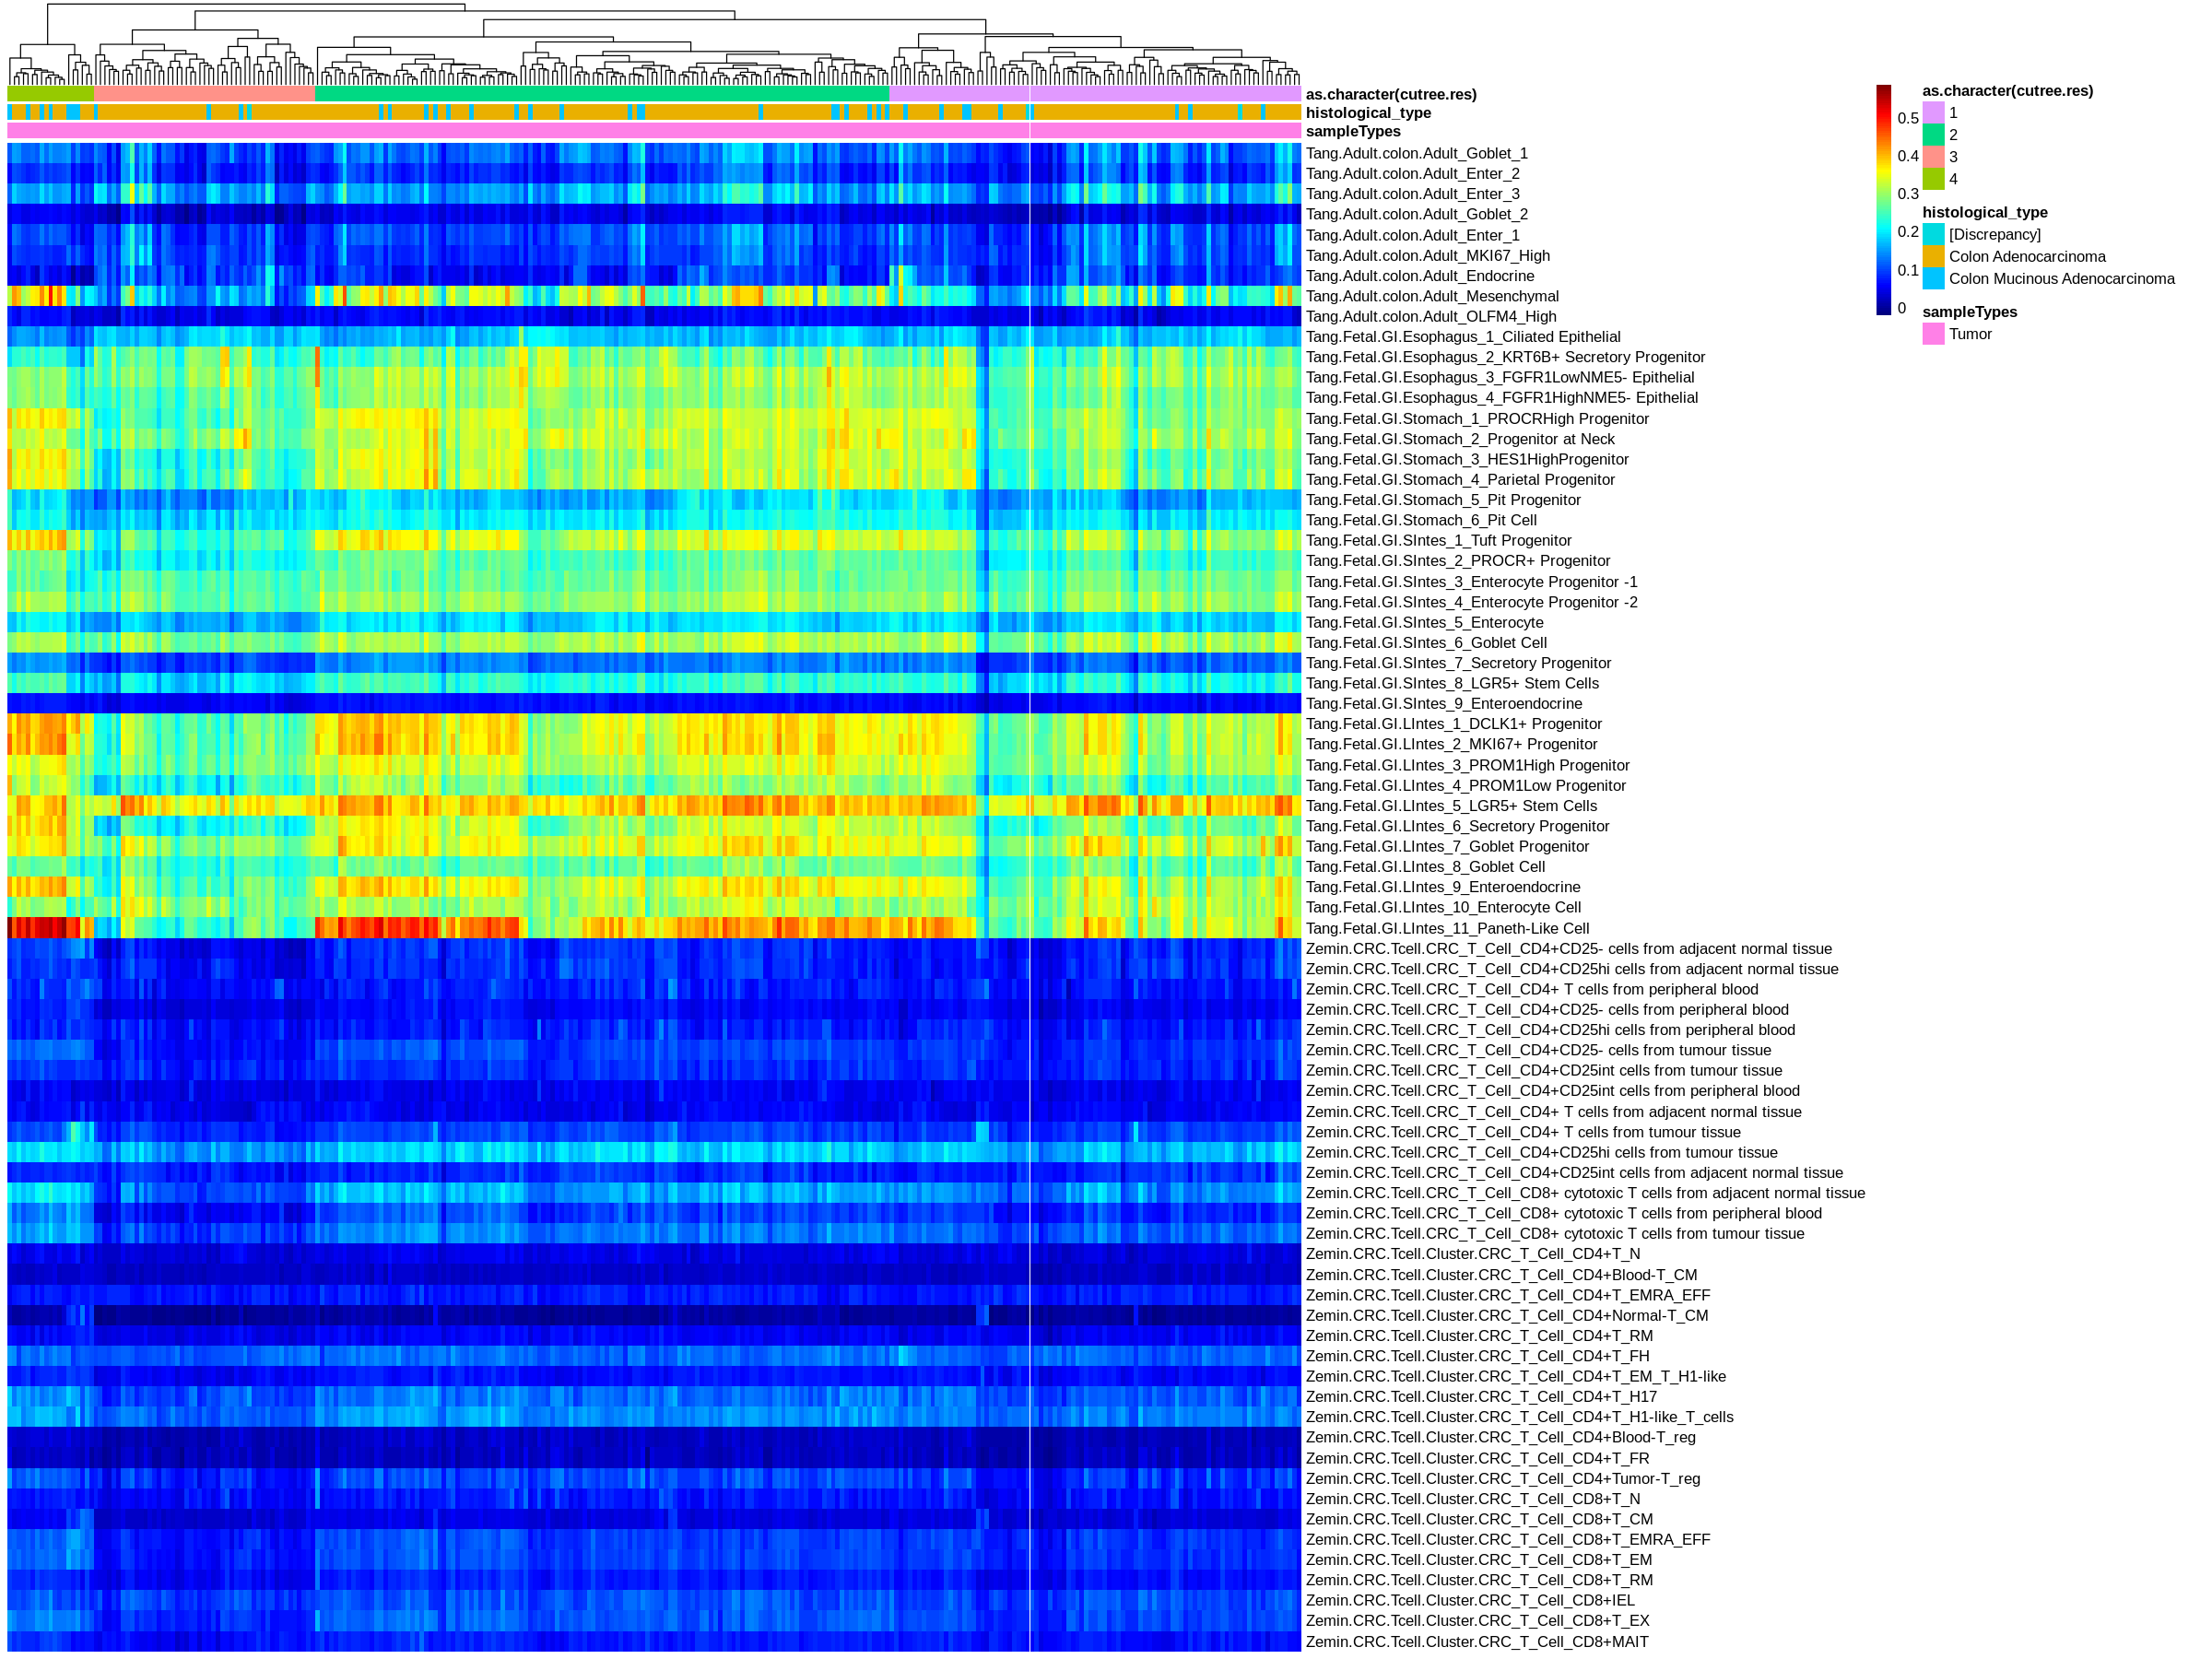

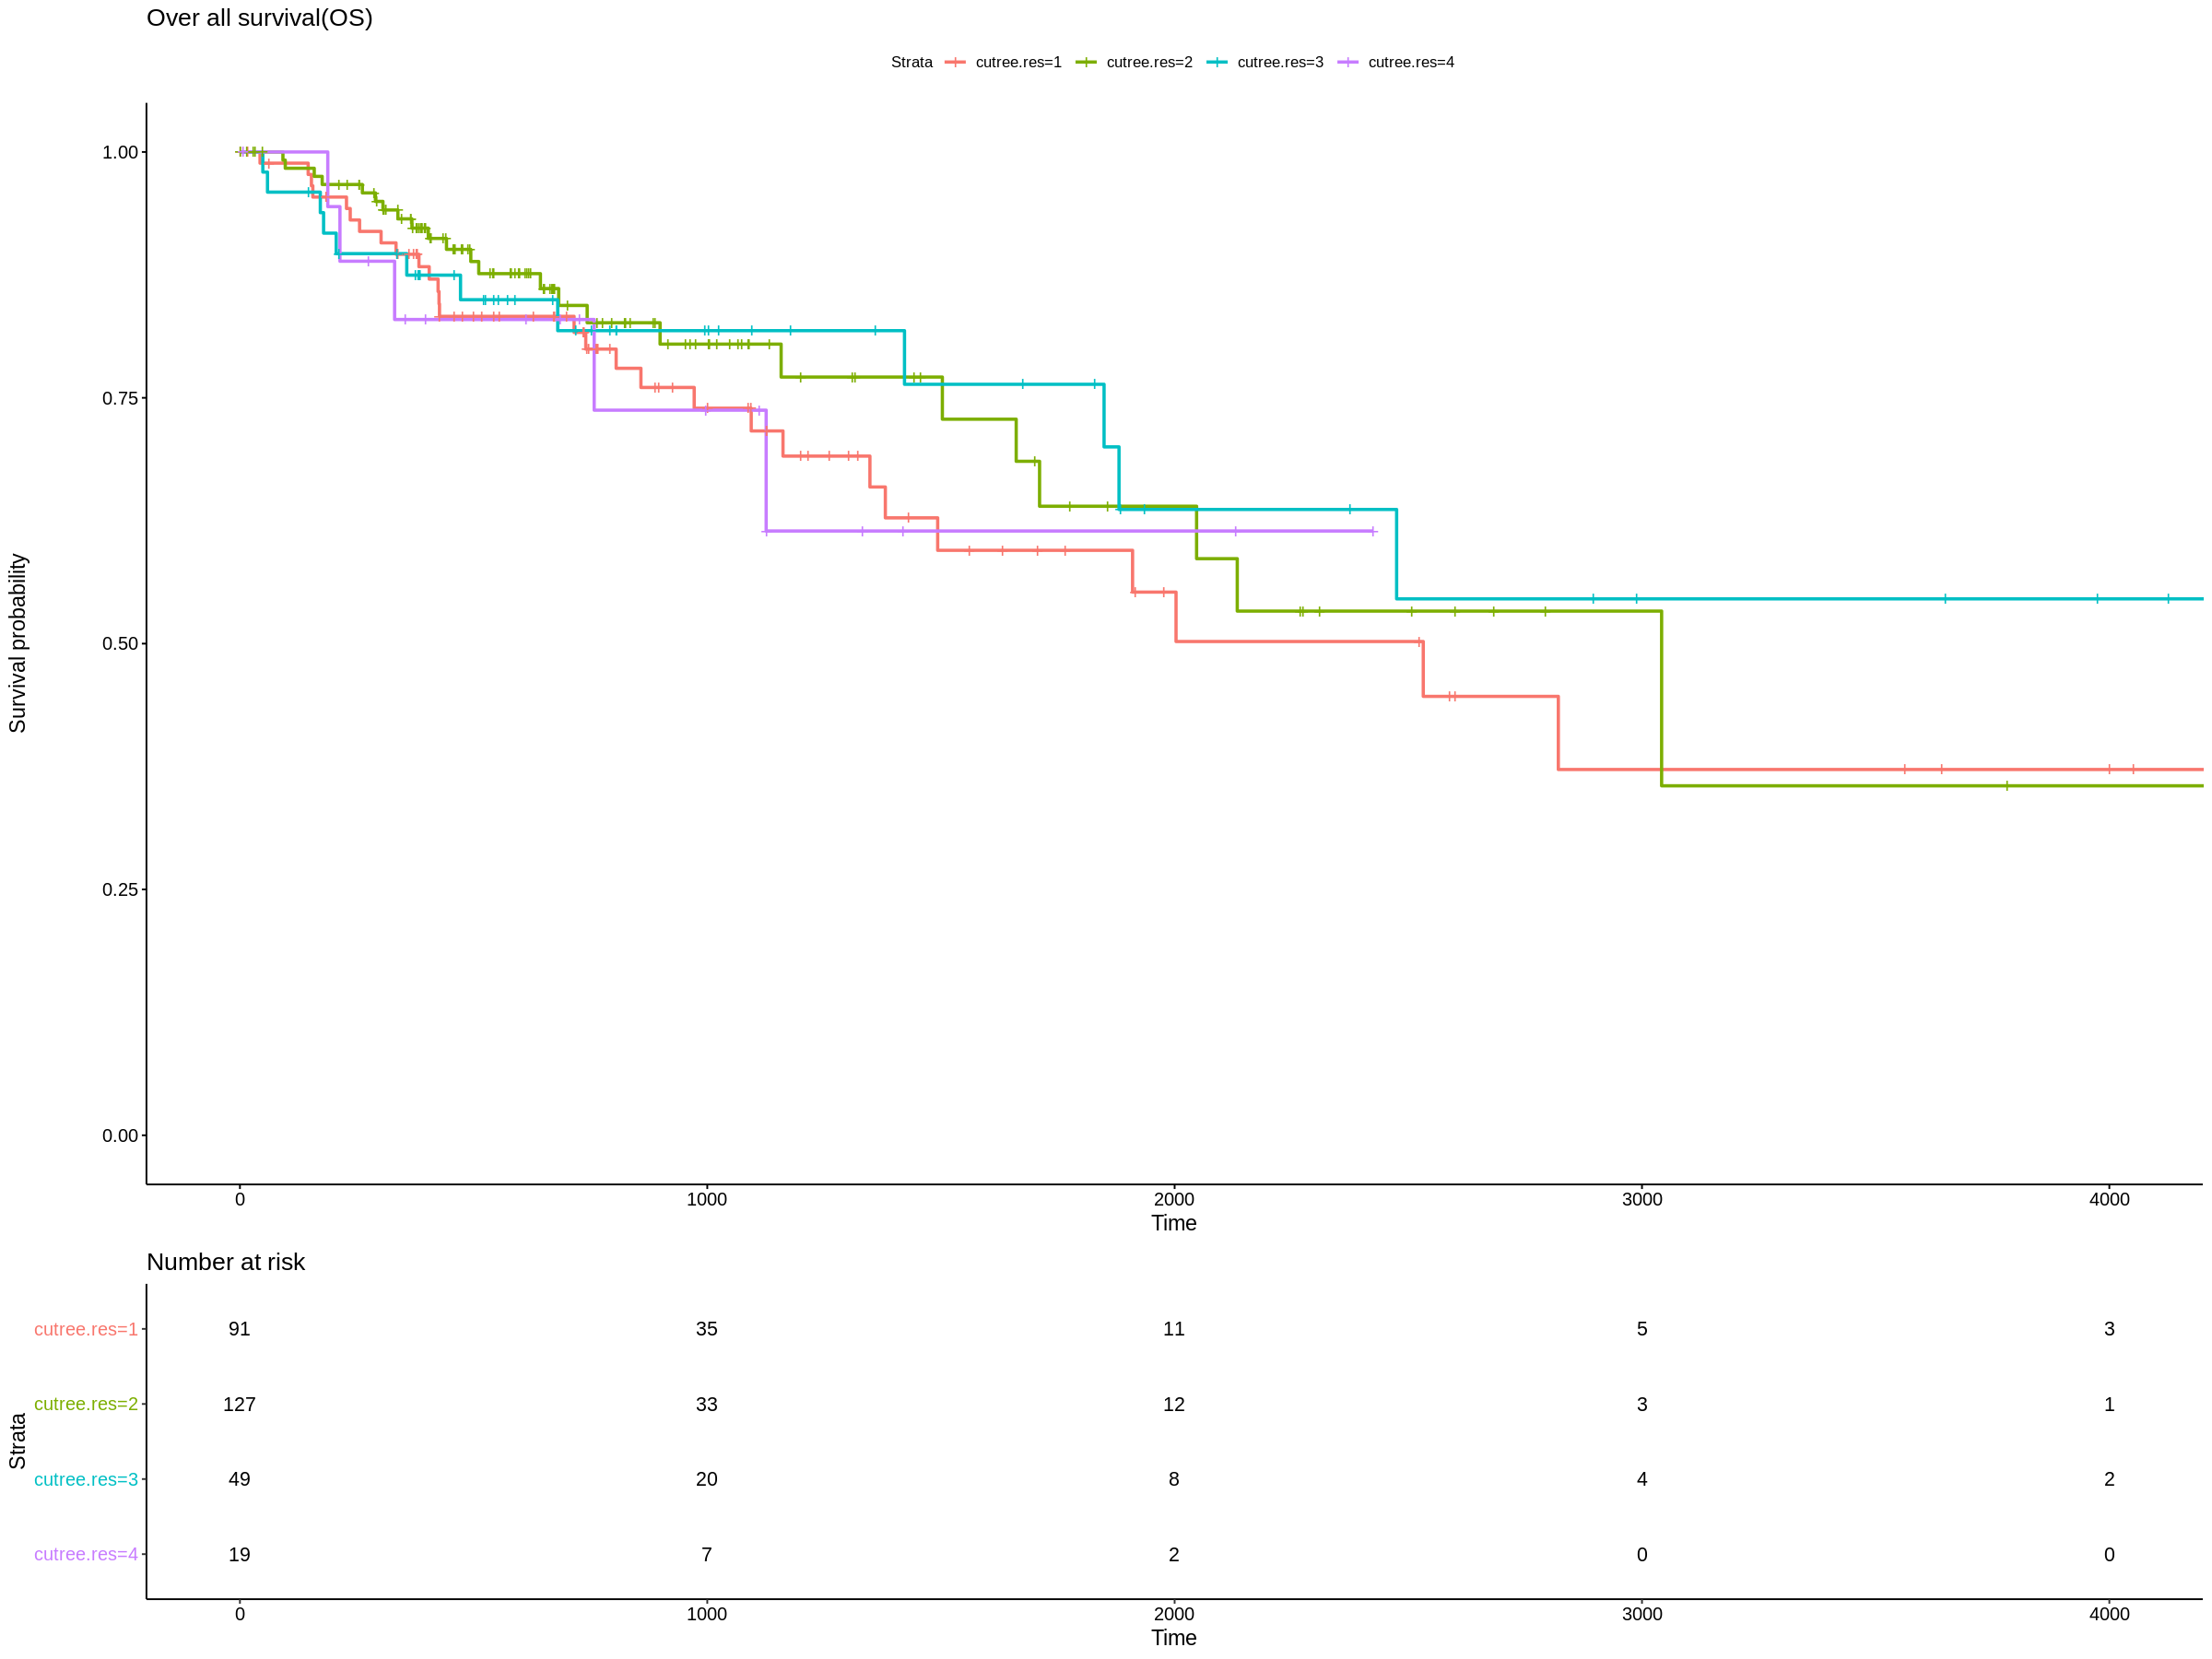

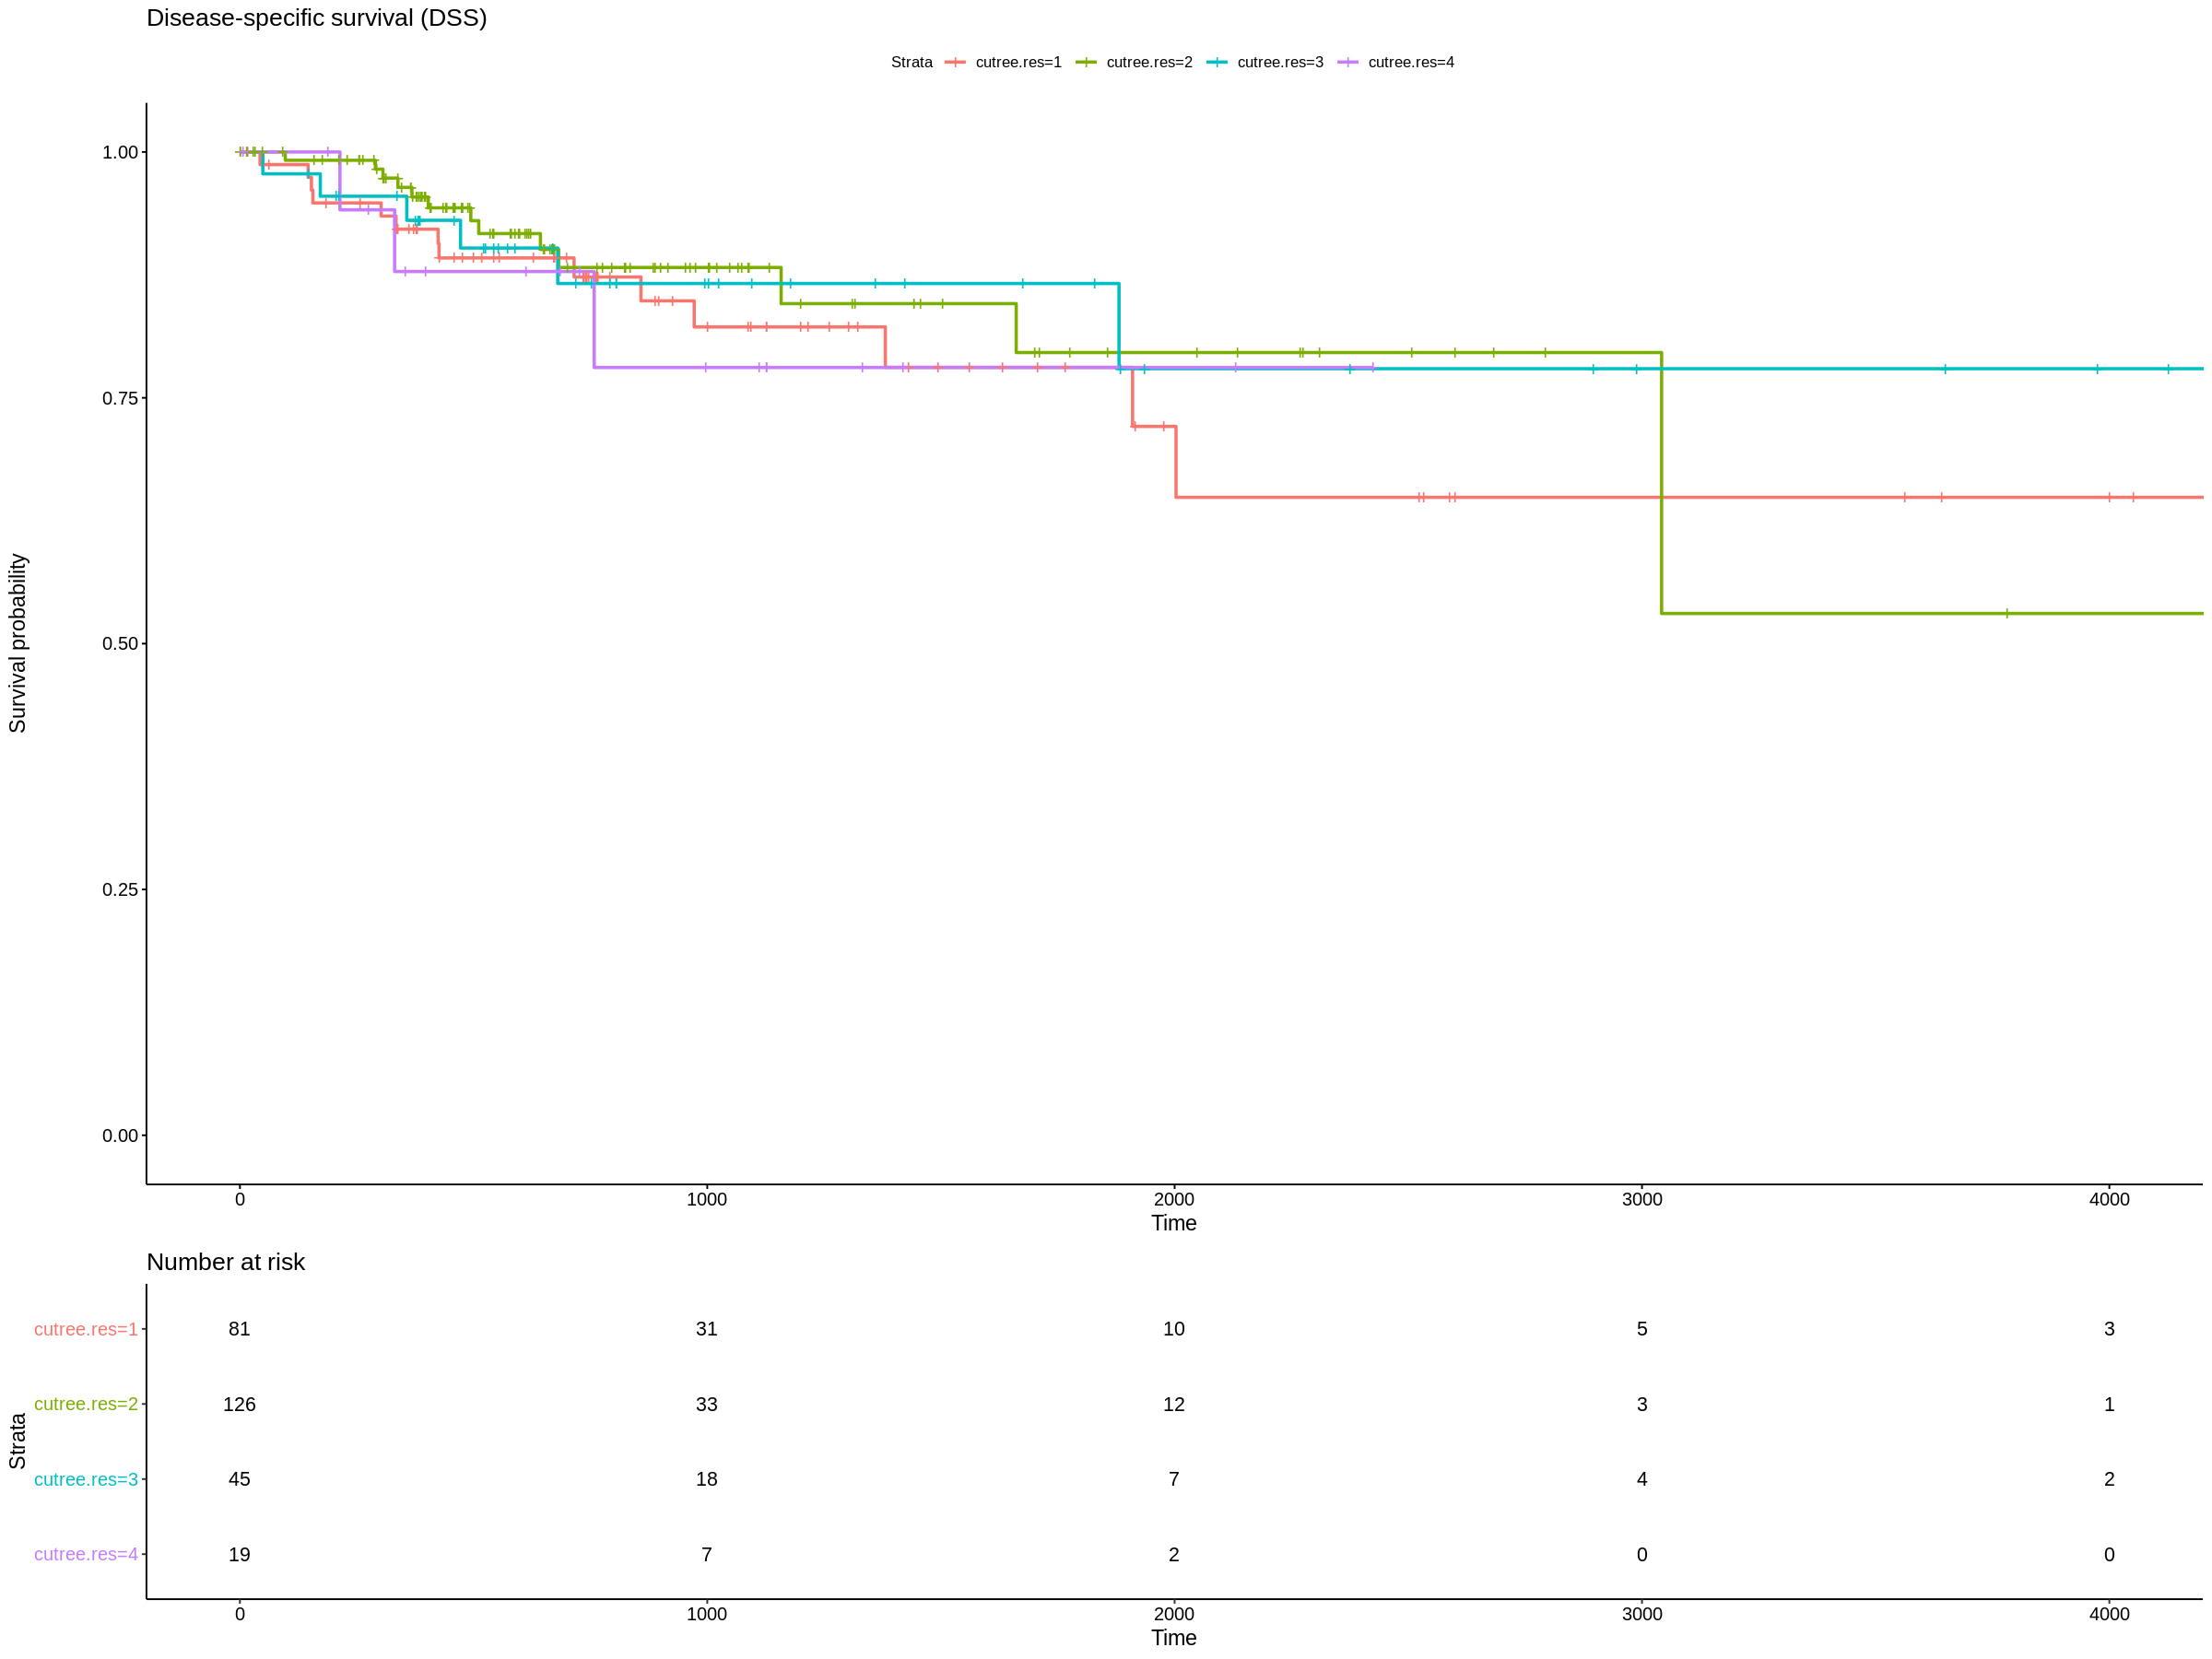

[[1]]

[[2]]

[[3]]

[[4]]

attr(,"class")
[1] "list"            "ggsurvplot_list"

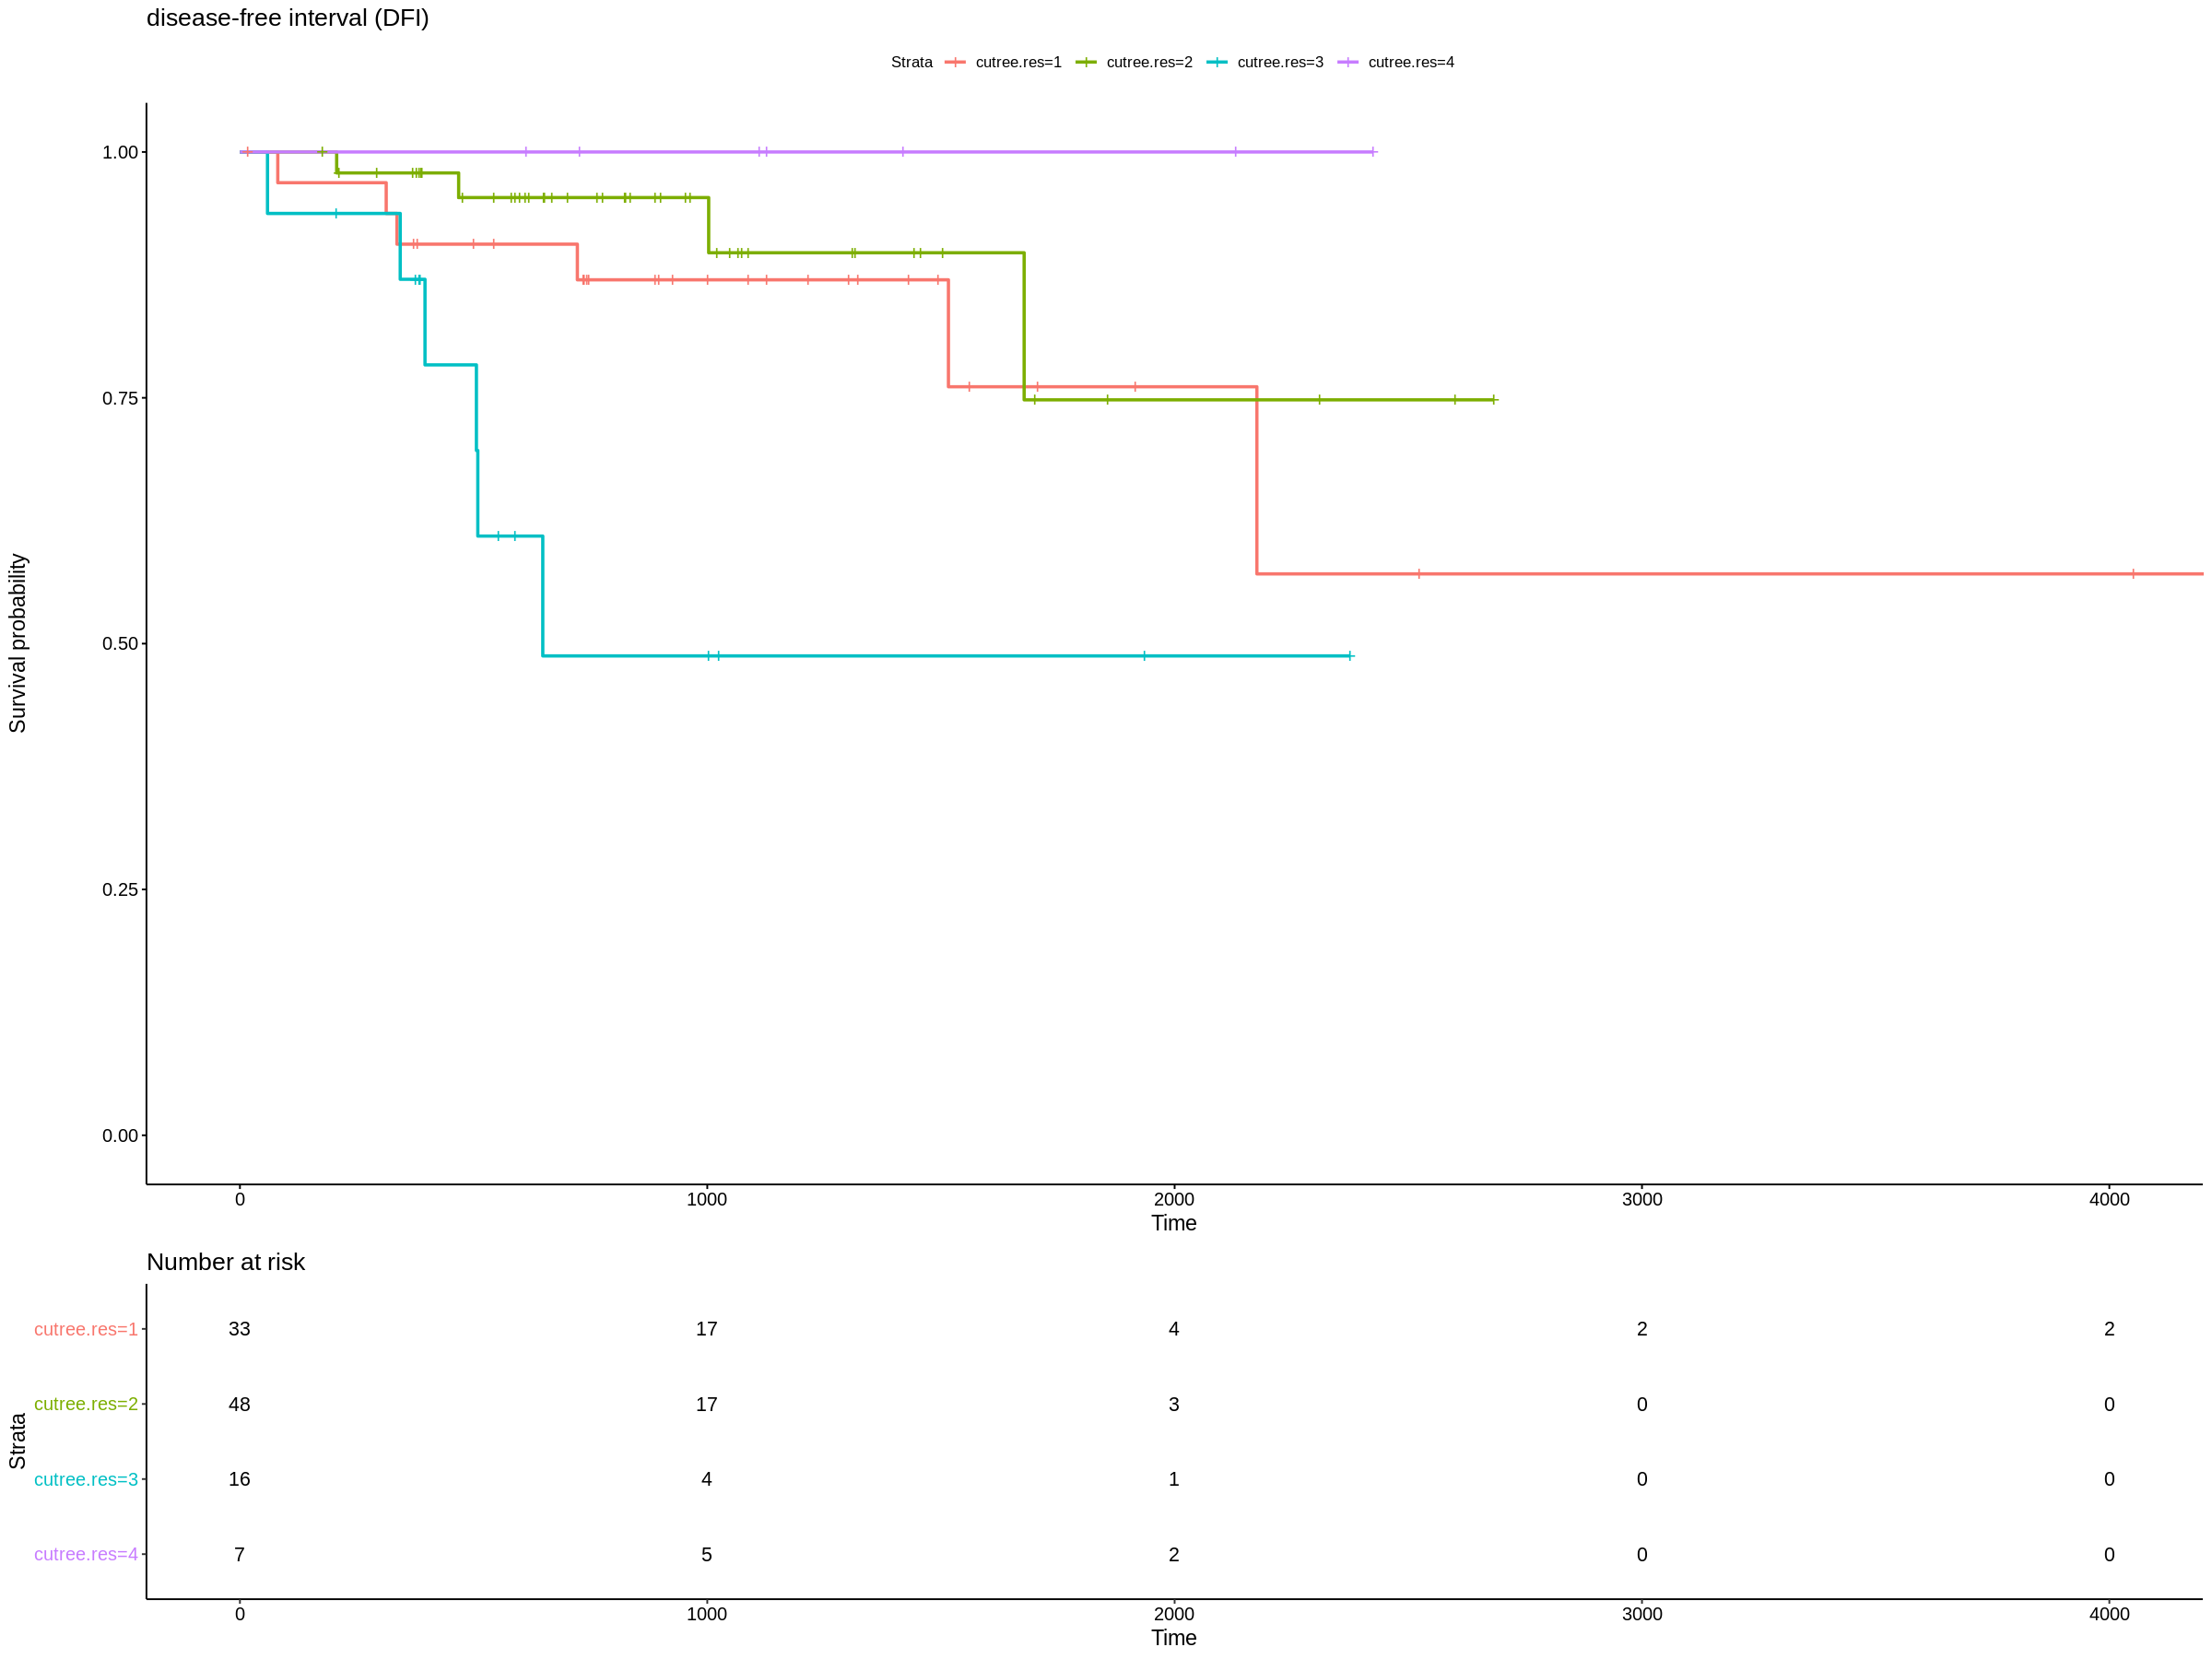

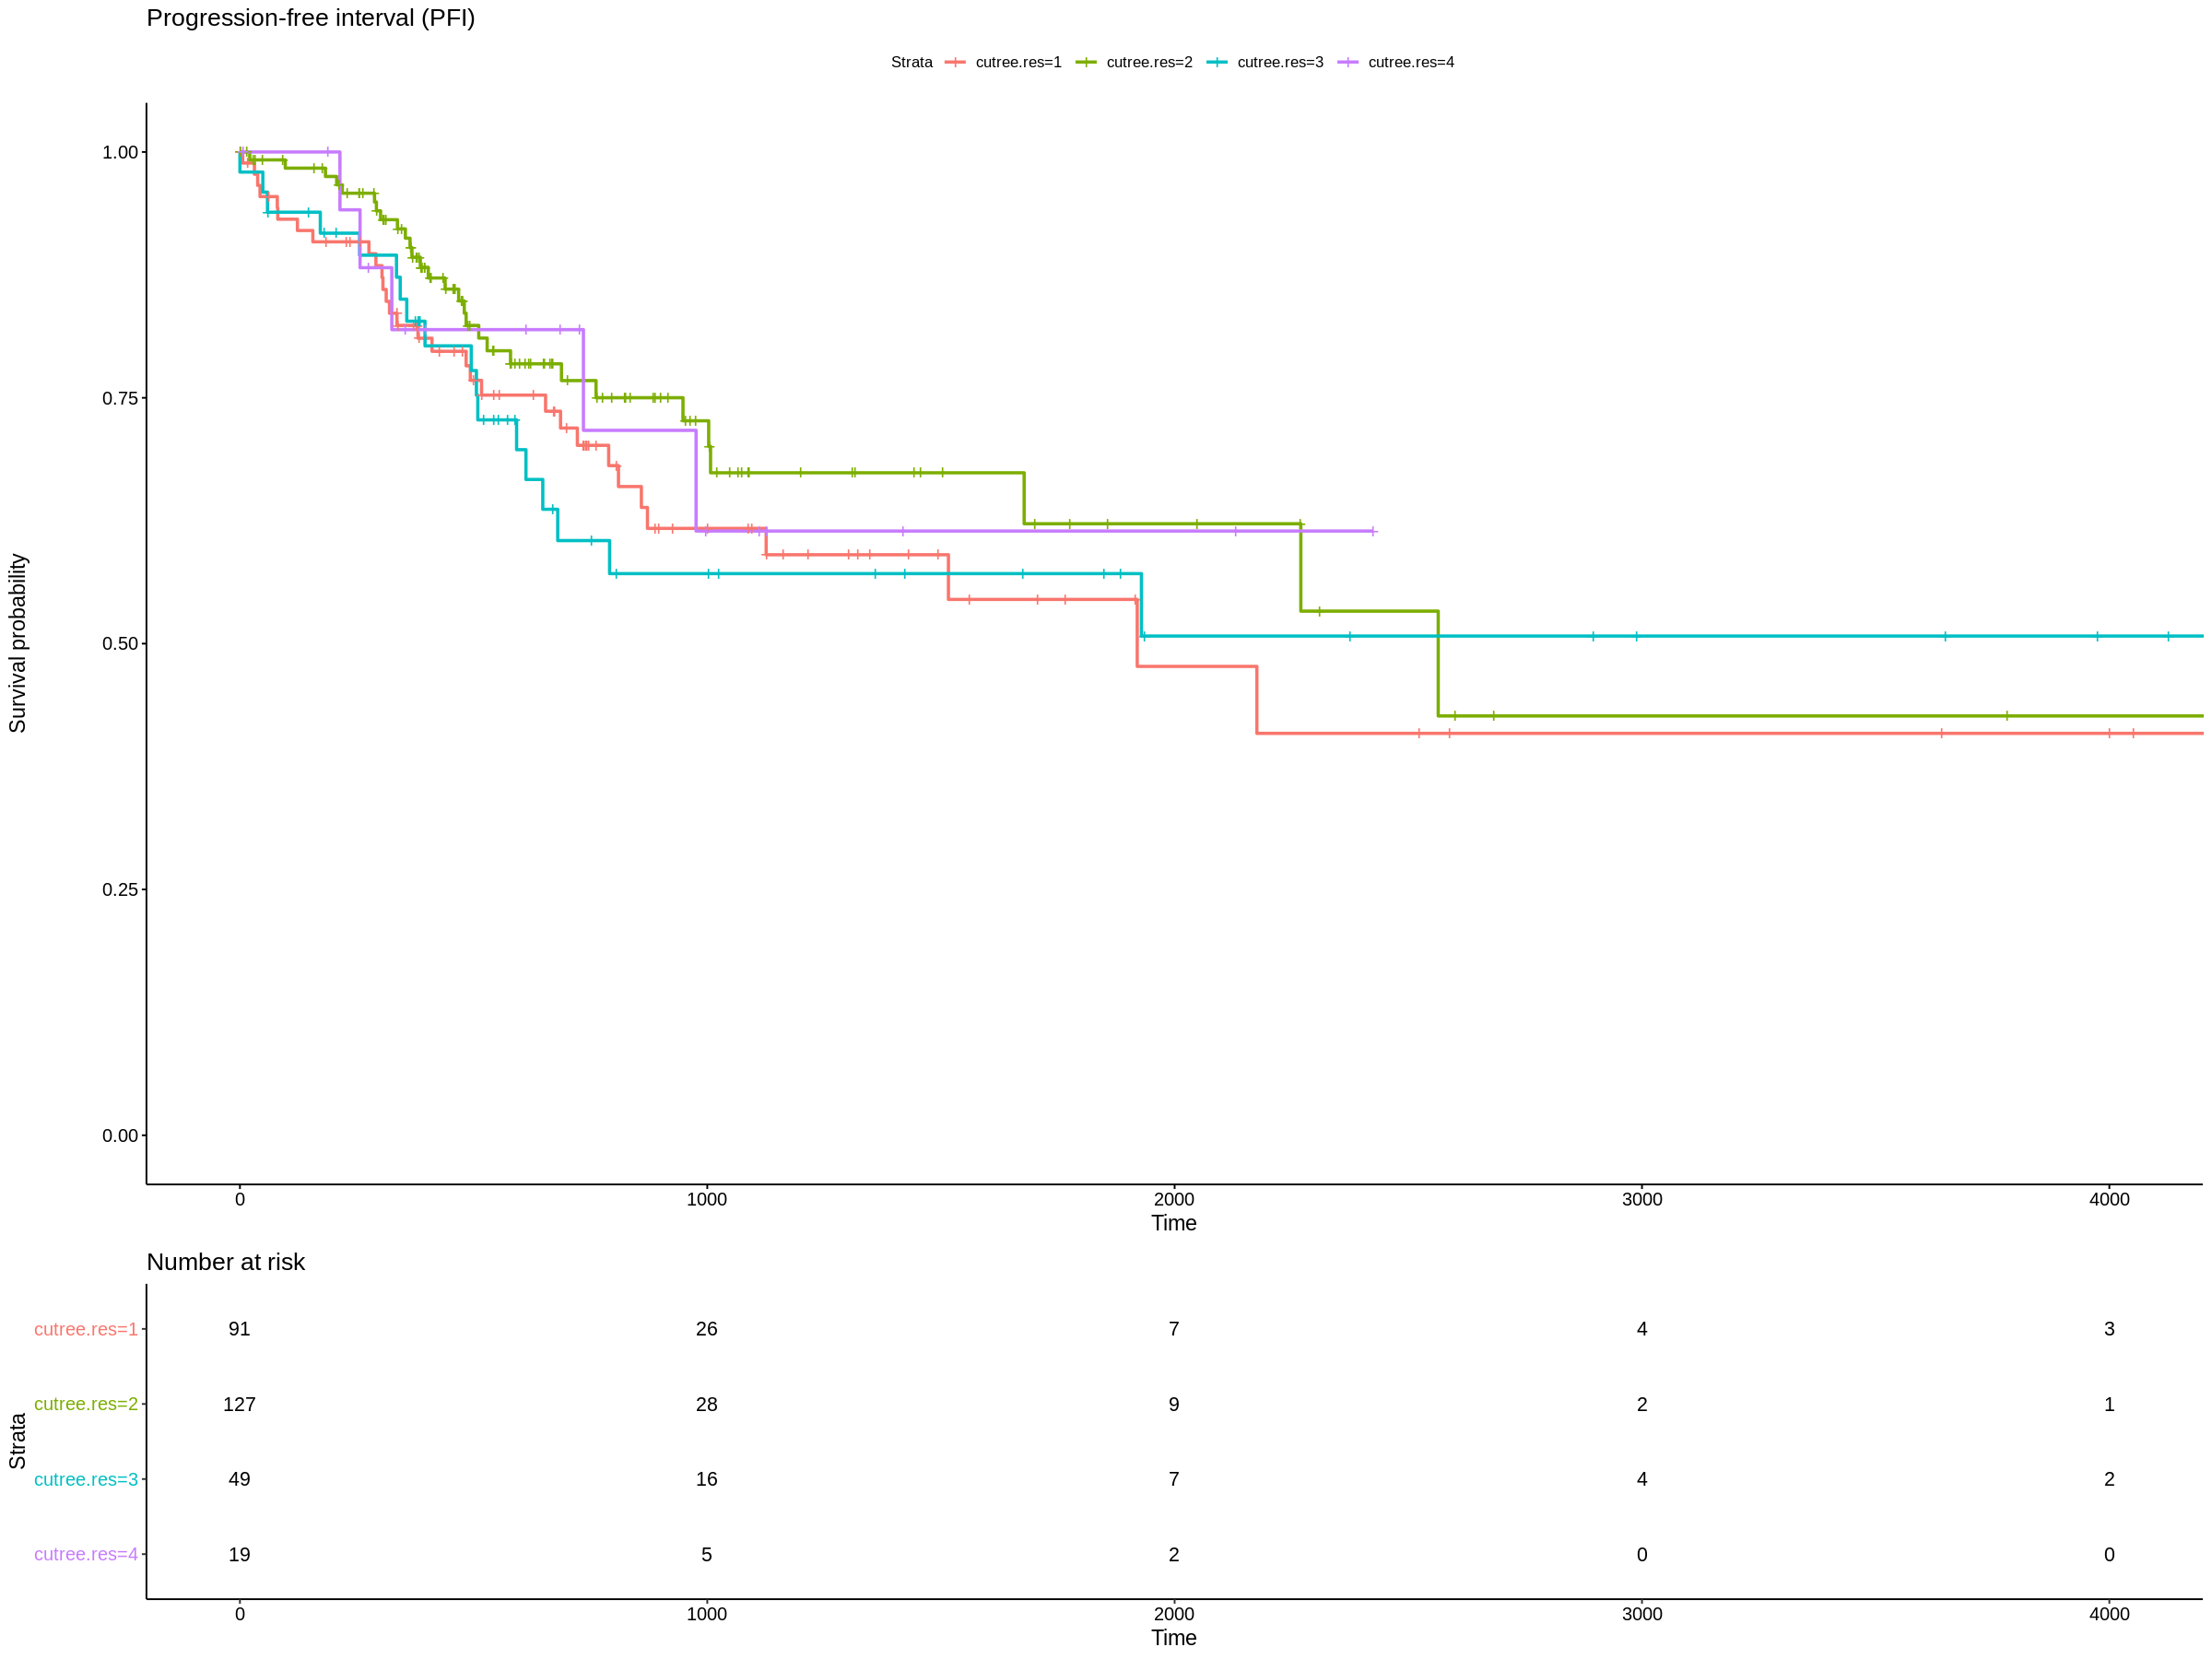

In [17]:
#Cor.merged.CV2500
TCGAClusterSurv(Input.tb = Cor.merged.CV2500, hclust.res = hclust.Res, Col.anno = COAD.pheno[TumorID,], k = 4)